In [6]:
#import matplotlib
#matplotlib.use('Agg')
import pymzml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import pickle
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches

In [ ]:
%%capture
file_path = "D:\ETH\RA\Aqua_Peptide_Extraction\AQUAoutDecoy\pyprophet_result_global\OUT_TSV_guot_PC1_170125_CPP1_sw.mzXML.gz.mzML_scored.txt"
df = pd.read_csv(file_path ,sep='\t', header=(0))
file = open("mslevel.txt","w") 
# Iterate over all selected peak groups
for i in range(len(df['aggr_Fragment_Annotation'])):
    fragment_ions = df['aggr_Fragment_Annotation'][i]
    # Get list of fragment ions for each peptide
    fragment_ions_list = fragment_ions.split(";")
    print("List of fragment ions : {}".format(fragment_ions_list))
    plt.gcf().clear()
    plt.figure()
    flag_main = 0
    # Iterate over each fragment ion
    for j in range(len(fragment_ions_list)):
        # The chrom.mzML file has to be opened on each iteration, otherwise leads to the information being discarded
        run = pymzml.run.Reader("D:\ETH\RA\Aqua_Peptide_Extraction\AQUAoutDecoy\OUT_CHROM_guot_PC1_170125_CPP1_sw.mzXML.gz.mzML.chrom.mzML")
        for spec in run:
            # Find and plot the curve for that fragment ion from the chrom.mzML file, after decoding the binary array
            if spec['id'] == fragment_ions_list[j]:
                # Find and plot the curve for the peptide group from the chrom.mzML file, after decoding the binary array
                if spec['id'] == df['peptide_group_label'][i] and flag_main == 0:
                    tmp_peak = spec.peaks
                    x = [float(z[0]) for z in tmp_peak]
                    y = [float(z[1]) for z in tmp_peak]
                    plt.plot(x,y,color='black')
                    file.write("Peptide Group ID : {} **** MS LEVEL = {}\n".format(spec['id'], spec["ms level"]))
                    flag_main = 1
                tmp_peak = spec.peaks
                file.write("Fragment Group ID : {} **** MS LEVEL = {}\n".format(spec['id'], spec["ms level"]))
                x = [float(z[0]) for z in tmp_peak]
                y = [float(z[1]) for z in tmp_peak]
                plt.plot(x,y,color='black')
    # Slice out the peak group of interest to us
    plt.xlim(df['leftWidth'][i],df['rightWidth'][i])
    # Remove the axes
    plt.axis('off')
    # Save the extracted peak group image without white spaces
    plt.savefig('Row{}.png'.format(i), bbox_inches='tight')
    #plt.show()
file.close()

In [ ]:
run = pymzml.run.Reader("D:\ETH\RA\Aqua_Peptide_Extraction\AQUAoutDecoy\OUT_CHROM_guot_PC1_170125_CPP1_sw.mzXML.gz.mzML.chrom.mzML")
for spec in run:
    #print(spec)
    if spec['id']=="DECOY_90000037_GGYTLVSGYPK(UniMod:259)_2":
        print(spec.peaks)
        tmp_peaks=spec.peaks

In [ ]:
x = [float(i[0]) for i in tmp_peaks]
y = [float(i[1]) for i in tmp_peaks]

plt.plot(x, y)
plt.xlim(1900.5,2000)

plt.show()

In [ ]:
plt.show()

In [3]:
run = pymzml.run.Reader("D:\ETH\RA\Aqua_Peptide_Extraction\AQUAoutDecoy\OUT_CHROM_guot_PC1_170125_CPP1_sw.mzXML.gz.mzML.chrom.mzML")
for spec in run:
    #print(spec)
    if spec['id']=="DECOY_90000037_GGYTLVSGYPK(UniMod:259)_2":
        print(spec['precursors'][0]['mz'])

found user param inside precursor!
{'value': 'LSEPAELTDAVK', 'type': 'xsd:string', 'name': 'peptide_sequence'}
found user param inside precursor!
{'value': 'TELPVDESALAK', 'type': 'xsd:string', 'name': 'peptide_sequence'}
found user param inside precursor!
{'value': 'TELPVDESALAK', 'type': 'xsd:string', 'name': 'peptide_sequence'}
found user param inside precursor!
{'value': 'LSEPAELTDAVK', 'type': 'xsd:string', 'name': 'peptide_sequence'}
found user param inside precursor!
{'value': 'SLVTGYGYGPK', 'type': 'xsd:string', 'name': 'peptide_sequence'}
found user param inside precursor!
{'value': 'GGYTLVSGYPK', 'type': 'xsd:string', 'name': 'peptide_sequence'}
found user param inside precursor!
{'value': 'SLVTGYGYGPK', 'type': 'xsd:string', 'name': 'peptide_sequence'}
575.3051
found user param inside precursor!
{'value': 'GGYTLVSGYPK', 'type': 'xsd:string', 'name': 'peptide_sequence'}
found user param inside precursor!
{'value': 'RVGMVGPGEPEEVVGTK', 'type': 'xsd:string', 'name': 'peptide_se

found user param inside precursor!
{'value': 'TFAQGPINCLSK', 'type': 'xsd:string', 'name': 'peptide_sequence'}
found user param inside precursor!
{'value': 'TFAQGPINCLSK', 'type': 'xsd:string', 'name': 'peptide_sequence'}
found user param inside precursor!
{'value': 'TFAQGPINCLSK', 'type': 'xsd:string', 'name': 'peptide_sequence'}
found user param inside precursor!
{'value': 'LNISFPATGCQK', 'type': 'xsd:string', 'name': 'peptide_sequence'}
found user param inside precursor!
{'value': 'LNISFPATGCQK', 'type': 'xsd:string', 'name': 'peptide_sequence'}
found user param inside precursor!
{'value': 'LNISFPATGCQK', 'type': 'xsd:string', 'name': 'peptide_sequence'}
found user param inside precursor!
{'value': 'TFAQGPINCLSK', 'type': 'xsd:string', 'name': 'peptide_sequence'}
found user param inside precursor!
{'value': 'TFAQGPINCLSK', 'type': 'xsd:string', 'name': 'peptide_sequence'}
found user param inside precursor!
{'value': 'CTWLIEGQPNR', 'type': 'xsd:string', 'name': 'peptide_sequence'}
fo

In [11]:
# Find all Decoys


file_path = "D:\ETH\RA\Aqua_Peptide_Extraction\AQUAoutDecoy\pyprophet_result_global\OUT_TSV_guot_PC1_170125_CPP1_sw.mzXML.gz.mzML_scored.txt"
df = pd.read_csv(file_path ,sep='\t', header=(0))
df1 = df[df['peptide_group_label'].str.contains("DECOY")]
#df1[['peptide_group_label', 'Sequence']]
df2 = df1.drop_duplicates(subset=['peptide_group_label', 'Sequence'], keep="first")
df2[['peptide_group_label', 'Sequence']]

peptide_group_label           Sequence
10                        DECOY_10000037_GGYTLVSGYPK_2        SLVTGYGYGPK
20           DECOY_90000068_LSEPAELTDAVK(UniMod:259)_2       TELPVDESALAK
35                       DECOY_10000069_LSEPAELTDAVK_3       TELPVDESALAK
40           DECOY_90000069_LSEPAELTDAVK(UniMod:259)_3       TELPVDESALAK
55       DECOY_10000077_RTEGVGPGVPGEVEM(UniMod:35)VK_3  RVGMVGPGEPEEVVGTK
70             DECOY_90000026_FDTQYPYGEK(UniMod:259)_2         GYYQEPTDFK
95                       DECOY_10000012_DINTFVGTPVEK_2       GFVETNIVPDTK
100          DECOY_90000012_DINTFVGTPVEK(UniMod:259)_2       GFVETNIVPDTK
105  DECOY_90000032_GC(UniMod:4)VPEPGAAVAASK(UniMod...     AGAPAPVVCASEGK
110          DECOY_90000047_IIDGVPVEITEK(UniMod:259)_2       EVVEIPDITIGK
120           DECOY_90000037_GGYTLVSGYPK(UniMod:259)_2        SLVTGYGYGPK
140  DECOY_90000011_DC(UniMod:4)SSIPSVPGSC(UniMod:4...      VISCGPSCPSDSK
155          DECOY_10000032_GC(UniMod:4)VPEPGAAVAASK_2     AGAPAPVVCASEGK
160                      DECOY_10000047_IIDGVPVEITEK_2       EVVEIPDITIGK
170             DECOY_10000010_C(UniMod:4)TWLIEGQPNR_2        GIELQWTNPCR
180  DECOY_90000065_LNISFPATGC(UniMod:4)QK(UniMod:2...       TFAQGPINCLSK
190  DECOY_90000010_C(UniMod:4)TWLIEGQPNR(UniMod:26...        GIELQWTNPCR
200         DECOY_90000029_FPQLDSTSFANSR(UniMod:267)_2      SPSTNFLQASDFR
215                   DECOY_10000017_DNYLGGTSTISDNAK_2    TGDISYNTSLNADGK
220       DECOY_90000017_DNYLGGTSTISDNAK(UniMod:259)_2    TGDISYNTSLNADGK
235                     DECOY_10000029_FPQLDSTSFANSR_2      SPSTNFLQASDFR
240          DECOY_90000107_YQEVTNNLEFAK(UniMod:259)_2       NTNFLEQEAVYK
250                     DECOY_10000102_VYENYPTYDLTER_2      YYTTDPEYLENVR
270         DECOY_90000102_VYENYPTYDLTER(UniMod:267)_2      YYTTDPEYLENVR

In [ ]:
file_path = "D:\ETH\RA\Aqua_Peptide_Extraction\AQUAoutDecoy\pyprophet_result_global\OUT_TSV_guot_PC1_170125_CPP1_sw.mzXML.gz.mzML_scored.txt"
df = pd.read_csv(file_path ,sep='\t', header=(0))
df

In [ ]:
df.loc[df.groupby("transition_group_id")["transition_group_id_m_score"].idxmin()]

In [ ]:
%%capture
bw = 0 # 0 = Color, 1 = Black and White
logscale = 0 # 1 = log scale, 0 = linear scale
axes = 0 # 0 = No axes, 1 = Axes

def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

pyprophet_dir = "D:\ETH\RA\Aqua_Peptide_Extraction\mzxml_decoy\PC4"
chrom_mzml_dir = "D:\ETH\RA\Aqua_Peptide_Extraction\mzxml_decoy\openswath_results"

for result_filename in sorted(os.listdir(pyprophet_dir)):
    if result_filename.endswith("scored.txt"):
        core_file_name = find_between(result_filename,"TSV_",".mzXML")
        chrom_file_name = "OUT_CHROM_" + core_file_name + ".mzXML.gz.chrom.mzML"
        chrom_file_path = os.path.join(chrom_mzml_dir,"{}".format(chrom_file_name))
        df = pd.read_csv(os.path.join(pyprophet_dir,result_filename),sep='\t', header=(0))
        file = open("log.txt","a") 
        # Iterate over all selected peak groups
        for i in range(len(df['aggr_Fragment_Annotation'])):
            fragment_ions = df['aggr_Fragment_Annotation'][i]
            # Get list of fragment ions for each peptide
            fragment_ions_list = fragment_ions.split(";")
            print("List of fragment ions : {}".format(fragment_ions_list))
            plt.gcf().clear()
            plt.figure()
            flag_main = 0
            # Iterate over each fragment ion
            for j in range(len(fragment_ions_list)):
                # The chrom.mzML file has to be opened on each iteration, otherwise leads to the information being discarded
                run = pymzml.run.Reader(chrom_file_path)
                for spec in run:
                    # Find and plot the curve for that fragment ion from the chrom.mzML file, after decoding the binary array
                    if spec['id'] == fragment_ions_list[j]:
                        # Find and plot the curve for the peptide group from the chrom.mzML file, after decoding the binary array
                        if spec['id'] == df['peptide_group_label'][i] and flag_main == 0:
                            tmp_peak = spec.peaks
                            x = [float(z[0]) for z in tmp_peak]
                            y = [float(z[1]) for z in tmp_peak]
                            if bw ==1:
                                plt.plot(x,y,color='black')
                            else:
                                plt.plot(x,y)
                            file.write("Extracting from file - {}".format(result_filename))
                            file.write("Extracting from CHROM file - {}".format(chrom_file_name))
                            file.write("Peptide Group ID : {} **** M/Z = {}\n".format(spec['id'], spec['precursors'][0]['mz']))
                            flag_main = 1
                        tmp_peak = spec.peaks
                        file.write("Extracting from file - ".format(result_filename))
                        file.write("Extracting from CHROM file - ".format(chrom_file_name))
                        file.write("Fragment Group ID : {} **** M/Z = {}\n".format(spec['id'], spec['precursors'][0]['mz']))
                        x = [float(z[0]) for z in tmp_peak]
                        y = [float(z[1]) for z in tmp_peak]
                        if bw ==1:
                            plt.plot(x,y,color='black')
                        else:
                            plt.plot(x,y)
            # Slice out the peak group of interest to us
            plt.xlim(df['leftWidth'][i],df['rightWidth'][i])
            if logscale == 1:
                plt.yscale('log')
                #plt.xscale('log')
            if bw == 0 and logscale == 0:
                output_folder_prefix = "Color_LinearScale_Output"
            elif bw == 0 and logscale == 1:
                output_folder_prefix = "Color_LogScale_Output"
            elif bw == 1 and logscale == 0:
                output_folder_prefix = "BW_LinearScale_Output"
            else:
                output_folder_prefix = "BW_LogScale_Output"
            if df['peak_group_rank'][i] == 1:
                output_dir = r"C:\Users\Prashanth\$Development\Peptide_Extraction\{}\{}\{}\1".format(output_folder_prefix,core_file_name,df['peptide_group_label'][i])
            else:
                output_dir = r"C:\Users\Prashanth\$Development\Peptide_Extraction\{}\{}\{}\0".format(output_folder_prefix,core_file_name,df['peptide_group_label'][i])
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)
            if axes == 0:
            # Remove the axes
                plt.axis('off')
            # Save the extracted peak group image without white spaces
            filename = "{}_rank_{}.png".format(df['Sequence'][i],df['peak_group_rank'][i])
            plt.savefig(os.path.join(output_dir,filename), bbox_inches='tight')
            #plt.show()
        file.close()

In [ ]:
print("Finished extracting peak groups!")

In [ ]:
%%capture
# Plot and Save Data Distribution
def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

rt_x_list = []
intensity_y_list = []

pyprophet_dir = "D:\ETH\RA\Aqua_Peptide_Extraction\mzxml_decoy\pyprophet_result_global"
chrom_mzml_dir = "D:\ETH\RA\Aqua_Peptide_Extraction\mzxml_decoy\openswath_results"

for result_filename in os.listdir(pyprophet_dir):
    if result_filename.endswith("scored.txt"):
        core_file_name = find_between(result_filename,"TSV_","_sw")
        chrom_file_name = "OUT_CHROM_" + core_file_name + "_sw.mzXML.gz.chrom.mzML"
        chrom_file_path = os.path.join(chrom_mzml_dir,"{}".format(chrom_file_name))
        df = pd.read_csv(os.path.join(pyprophet_dir,result_filename),sep='\t', header=(0))
        for i in range(len(df['aggr_Fragment_Annotation'])):
            fragment_ions = df['aggr_Fragment_Annotation'][i]
            fragment_ions_list = fragment_ions.split(";")
            flag_main = 0
            for j in range(len(fragment_ions_list)):
                run = pymzml.run.Reader(chrom_file_path)
                for spec in run:
                    if spec['id'] == fragment_ions_list[j]:
                        if spec['id'] == df['peptide_group_label'][i] and flag_main == 0:
                            tmp_peak = spec.peaks
                            for z in tmp_peak:
                                rt_x_list.append(float(z[0]))
                                intensity_y_list.append(float(z[1]))
                            flag_main = 1
                        tmp_peak = spec.peaks
                        for z in tmp_peak:
                            rt_x_list.append(float(z[0]))
                            intensity_y_list.append(float(z[1]))

In [ ]:
plt.gcf().clear()
plt.figure()
plt.hist(rt_x_list,bins=100)
plt.title("Retention Time Histogram")
plt.xlabel("Retention Time")
plt.ylabel("Frequency")
plt.savefig("RT_Distribution.png")

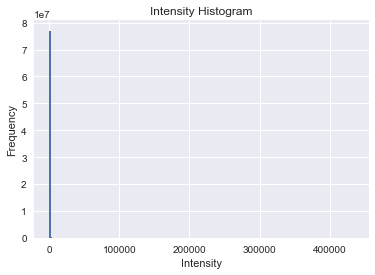

In [18]:
plt.gcf().clear()
plt.figure()
plt.hist(intensity_y_list,orientation='vertical',bins=200)# normed=1, facecolor='green', bins=np.arange(min(intensity_y_list), max(intensity_y_list)+1))
plt.title("Intensity Histogram")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.savefig("Intensity_Distribution.png")

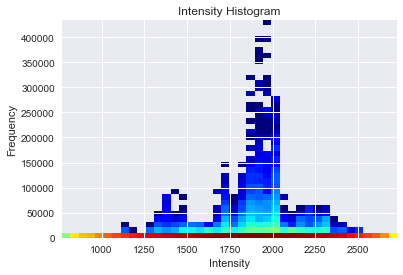

In [13]:
from matplotlib.colors import LogNorm

plt.gcf().clear()
plt.figure()
cmap = plt.get_cmap('jet')
plt.hist2d(rt_x_list, intensity_y_list, bins=40,cmap=cmap, norm=LogNorm())
plt.title("Intensity Histogram")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.savefig("Intensity_Distribution1.png")

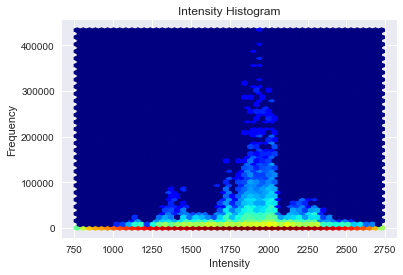

In [14]:
import matplotlib.colors as mcolors
plt.gcf().clear()
plt.figure()
cmap = plt.get_cmap('jet')
norm = mcolors.LogNorm()
plt.hexbin(rt_x_list, intensity_y_list, cmap = cmap, norm = norm, gridsize = 50)
plt.title("Intensity Histogram")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.savefig("Intensity_Distribution2.png")

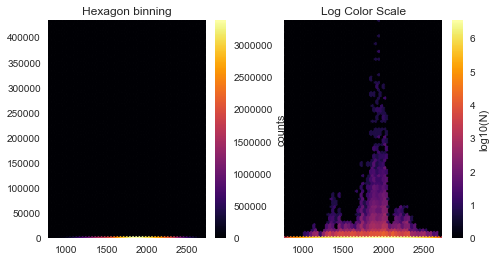

In [16]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n = 100000
x = rt_x_list
y = intensity_y_list
xmin = min(x)
xmax = max(x)
ymin = min(y)
ymax = max(y)

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("Log Color Scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

x = rt_x_list
y = intensity_y_list

nullfmt = NullFormatter()      

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

In [ ]:
plt.gcf().clear()
plt.figure()
plt.scatter(rt_x_list, intensity_y_list)
plt.savefig("Scatter_Plot.png")

In [ ]:
# Pickle RT_X_LIST and INTENSITY_Y_LIST
with open("RT_List_all.txt", "wb") as fp:
    pickle.dump(rt_x_list, fp)

with open("Intensity_List_all.txt", "wb") as fp:   
    pickle.dump(intensity_y_list, fp)

In [4]:
len(intensity_y_list)

77412942

In [5]:
len(rt_x_list)

77412942

In [2]:
# Unpickle Intensity list
with open("D:\ETH\RA\Aqua_Peptide_Extraction\Intensity_List_all.txt", "rb") as fp:
    intensity_y_list = pickle.load(fp)

In [3]:
with open("D:\ETH\RA\Aqua_Peptide_Extraction\RT_List_all.txt", "rb") as fp:
    rt_x_list = pickle.load(fp)

In [3]:
fragmentIonColorDict ={}  

In [36]:
import random

randColor = random.choice(colorlist)
print(len(colorlist))
print(randColor)
colorlist.remove(randColor)
print(len(colorlist))

143
lawngreen
142


In [11]:
fragmentIonColorDict[546.36] = "black"

In [28]:
import matplotlib
colorlist = []
for name, hex in matplotlib.colors.cnames.items():
    colorlist.append(name)  
colorlist

['turquoise',
 'burlywood',
 'darkolivegreen',
 'mediumturquoise',
 'blueviolet',
 'coral',
 'bisque',
 'slategray',
 'darkturquoise',
 'khaki',
 'springgreen',
 'lightgray',
 'lime',
 'lightgreen',
 'ivory',
 'lightcyan',
 'lightslategray',
 'peachpuff',
 'rosybrown',
 'antiquewhite',
 'mediumpurple',
 'linen',
 'seashell',
 'cornsilk',
 'palevioletred',
 'orchid',
 'plum',
 'tan',
 'royalblue',
 'darkviolet',
 'deepskyblue',
 'darkslateblue',
 'darkgray',
 'mistyrose',
 'rebeccapurple',
 'aquamarine',
 'deeppink',
 'navy',
 'silver',
 'darkred',
 'midnightblue',
 'azure',
 'slategrey',
 'dimgray',
 'darkslategray',
 'mediumspringgreen',
 'slateblue',
 'goldenrod',
 'chartreuse',
 'darkgrey',
 'powderblue',
 'mediumseagreen',
 'firebrick',
 'cornflowerblue',
 'moccasin',
 'oldlace',
 'lavender',
 'beige',
 'thistle',
 'indianred',
 'darkorange',
 'salmon',
 'saddlebrown',
 'snow',
 'lightsteelblue',
 'navajowhite',
 'magenta',
 'darkmagenta',
 'whitesmoke',
 'lightsalmon',
 'wheat',
 

In [18]:
def getFragmentIonColor(mz):
    if mz in fragmentIonColorDict:
        return fragmentIonColorDict[mz]
    else
        fragmentIonColorDict[mz] = 

In [4]:
def countFragmentIons(mz):
    if mz in fragmentIonColorDict:
        fragmentIonColorDict[mz] = fragmentIonColorDict[mz] + 1
    else:
        fragmentIonColorDict[mz] = 1

In [5]:
pyprophet_dir = "D:\ETH\RA\Aqua_Peptide_Extraction\mzxml_decoy\pyprophet_small"
chrom_mzml_dir = "D:\ETH\RA\Aqua_Peptide_Extraction\mzxml_decoy\pyprophet_small"
for result_filename in sorted(os.listdir(pyprophet_dir)):
    if result_filename.endswith("scored.txt"):
        core_file_name = find_between(result_filename,"TSV_",".mzXML")
        chrom_file_name = "OUT_CHROM_" + core_file_name + ".mzXML.gz.chrom.mzML"
        chrom_file_path = os.path.join(chrom_mzml_dir,"{}".format(chrom_file_name))
        df = pd.read_csv(os.path.join(pyprophet_dir,result_filename),sep='\t', header=(0))
        for i in range(len(df['aggr_Fragment_Annotation'])):
            fragment_ions = df['aggr_Fragment_Annotation'][i]
            fragment_ions_list = fragment_ions.split(";")
            print("List of fragment ions : {}".format(fragment_ions_list))
            run = pymzml.run.Reader(chrom_file_path)
            for j in range(len(fragment_ions_list)):
                    for spec in run:
                        # Find and plot the curve for that fragment ion from the chrom.mzML file, after decoding the binary array
                        if spec['id'] == fragment_ions_list[j]:
                            #print("Peptide Group ID : {} **** M/Z = {}\n".format(spec['id'], spec['precursors'][0]['mz']))
                            countFragmentIons(spec['precursors'][0]['mz'])

List of fragment ions : ['10001618_YQEVTNNLEFAK_2', '10001614_YQEVTNNLEFAK_2', '10001616_YQEVTNNLEFAK_2', '10001619_YQEVTNNLEFAK_2', '10001615_YQEVTNNLEFAK_2', '10001606_YQEVTNNLEFAK_2']
List of fragment ions : ['10001618_YQEVTNNLEFAK_2', '10001614_YQEVTNNLEFAK_2', '10001616_YQEVTNNLEFAK_2', '10001619_YQEVTNNLEFAK_2', '10001615_YQEVTNNLEFAK_2', '10001606_YQEVTNNLEFAK_2']
List of fragment ions : ['10001618_YQEVTNNLEFAK_2', '10001614_YQEVTNNLEFAK_2', '10001616_YQEVTNNLEFAK_2', '10001619_YQEVTNNLEFAK_2', '10001615_YQEVTNNLEFAK_2', '10001606_YQEVTNNLEFAK_2']
List of fragment ions : ['10001618_YQEVTNNLEFAK_2', '10001614_YQEVTNNLEFAK_2', '10001616_YQEVTNNLEFAK_2', '10001619_YQEVTNNLEFAK_2', '10001615_YQEVTNNLEFAK_2', '10001606_YQEVTNNLEFAK_2']
List of fragment ions : ['10001618_YQEVTNNLEFAK_2', '10001614_YQEVTNNLEFAK_2', '10001616_YQEVTNNLEFAK_2', '10001619_YQEVTNNLEFAK_2', '10001615_YQEVTNNLEFAK_2', '10001606_YQEVTNNLEFAK_2']
List of fragment ions : ['10000958_LSEPAELTDAVK_2', '10000950_LSE

List of fragment ions : ['90000150_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2', '90000147_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2', '90000141_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2', '90000152_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2', '90000146_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2', '90000151_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2']
List of fragment ions : ['90000150_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2', '90000147_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2', '90000141_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2', '90000152_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2', '90000146_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2', '90000151_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2']
List of fragment ions : ['90000150_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2', '90000147_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2', '90000141_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2', '90000152_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2', '90000146_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2', '90000151_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2']
List of fragment ions : ['90000150_C(UniMod:4)TWLIEGQPNR(UniM

KeyboardInterrupt: 

In [8]:
fragmentIonColorDict

{424.8989333: 10,
 427.5656: 10,
 571.3051: 10,
 575.3051: 10,
 586.3061333: 10,
 624.2897: 5,
 628.2897: 10,
 636.8448: 5,
 640.8448: 10,
 656.8787: 10,
 657.3366: 6,
 660.3528: 10,
 660.8787: 10,
 661.3366: 10,
 664.3528: 10,
 668.347: 5,
 672.347: 10,
 687.3393: 10,
 692.3393: 10,
 697.3151: 5,
 701.3151: 10,
 728.3665: 5,
 732.3665: 10,
 735.3587: 10,
 740.3587: 10,
 778.3725: 10,
 782.3725: 10,
 821.4422: 5,
 825.4422: 5,
 831.8901: 10,
 836.8901: 10}

In [60]:
#import matplotlib
#matplotlib.use('Agg')

# Extracting Colored Peak Groups


import pymzml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import pickle
%matplotlib inline
import random
import re
import matplotlib
colorlist = []
for name, hex in matplotlib.colors.cnames.items():
    colorlist.append(name)
import colorsys
N = 100000
colorSpace = [colorsys.hsv_to_rgb(x*1.0/N, 0.5, 0.5) for x in range(N)]

logscale = 0 # 1 = log scale, 0 = linear scale
axes = 0 # 0 = No axes, 1 = Axes

def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

fragmentIonColorDict={}
def getFragmentIonColor(fid):
    if fid in fragmentIonColorDict:
        return fragmentIonColorDict[fid]
    else:
        randColor = random.choice(colorSpace)
        fragmentIonColorDict[fid] = randColor
        colorSpace.remove(randColor)
        return fragmentIonColorDict[fid]

pyprophet_dir = "D:\ETH\RA\Aqua_Peptide_Extraction\mzxml_decoy\pyprophet_small"
chrom_mzml_dir = "D:\ETH\RA\Aqua_Peptide_Extraction\mzxml_decoy\pyprophet_small"

for result_filename in sorted(os.listdir(pyprophet_dir)):
    if result_filename.endswith("scored.txt"):
        core_file_name = find_between(result_filename,"TSV_",".mzXML")
        chrom_file_name = "OUT_CHROM_" + core_file_name + ".mzXML.gz.chrom.mzML"
        chrom_file_path = os.path.join(chrom_mzml_dir,"{}".format(chrom_file_name))
        df = pd.read_csv(os.path.join(pyprophet_dir,result_filename),sep='\t', header=(0))
        #file = open("log.txt","a") 
        # Iterate over all selected peak groups
        for i in range(len(df['aggr_Fragment_Annotation'])):
            fragment_ions = df['aggr_Fragment_Annotation'][i]
            # Get list of fragment ions for each peptide
            fragment_ions_list = fragment_ions.split(";")
            plt.close('all')
            plt.gcf().clear()
            plt.figure()
            plt.rcParams['figure.facecolor'] = 'black'
            flag_main = 0
            # Iterate over each fragment ion
            for j in range(len(fragment_ions_list)):
                # The chrom.mzML file has to be opened on each iteration, otherwise leads to the information being discarded
                run = pymzml.run.Reader(chrom_file_path)
                for spec in run:
                    # Find and plot the curve for that fragment ion from the chrom.mzML file, after decoding the binary array
                    if spec['id'] == fragment_ions_list[j]:
                        # Find and plot the curve for the peptide group from the chrom.mzML file, after decoding the binary array
                        if spec['id'] == df['peptide_group_label'][i] and flag_main == 0:
                            tmp_peak = spec.peaks
                            x = [float(z[0]) for z in tmp_peak]
                            y = [float(z[1]) for z in tmp_peak]
                            fragmentIonColor = getFragmentIonColor(spec['id'])
                            plt.plot(x,y,color=fragmentIonColor)
                            print(spec['precursors'])
                            print("Peptide Group ID : {} ** M/Z = {} ** Color : {}\n".format(spec['id'], spec['precursors'][0]['mz'], fragmentIonColor))
                            flag_main = 1
                        tmp_peak = spec.peaks
                        x = [float(z[0]) for z in tmp_peak]
                        y = [float(z[1]) for z in tmp_peak]
                        print("ID = {} ".format(spec['id']))
                        fragmentIonColor = getFragmentIonColor(spec['id'])
                        plt.plot(x,y,color=fragmentIonColor)
                        print(spec['precursors'])
                        print("Fragment Group ID : {} **** M/Z = {} ** Color : {}\n".format(spec['id'], spec['precursors'][0]['mz'], fragmentIonColor))
            # Slice out the peak group of interest to us
            plt.xlim(df['leftWidth'][i],df['rightWidth'][i])
            if logscale == 1:
                plt.yscale('log')
            if logscale == 0:
                output_folder_prefix = "Color_LinearScale_Output"
            elif logscale == 1:
                output_folder_prefix = "Color_LogScale_Output"
            if df['peak_group_rank'][i] == 1:
                output_dir = r"C:\Users\Prashanth\$Development\Peptide_Extraction\{}\{}\{}\1".format(output_folder_prefix,core_file_name,re.sub('[^\w\-_\. ]', '_', df['peptide_group_label'][i]))
            else:
                output_dir = r"C:\Users\Prashanth\$Development\Peptide_Extraction\{}\{}\{}\0".format(output_folder_prefix,core_file_name,re.sub('[^\w\-_\. ]', '_', df['peptide_group_label'][i]))
            if not os.path.exists(output_dir):
                os.makedirs(output_dir)
            if axes == 0:
            # Remove the axes
                plt.axis('off')
            # Save the extracted peak group image without white spaces
            filename = "{}_rank_{}.png".format(df['Sequence'][i],df['peak_group_rank'][i])
            plt.savefig(os.path.join(output_dir,filename), bbox_inches='tight', facecolor='black', edgecolor='black')
            plt.close('all')
        #file.close()
with open("fragmentIonColorDict.pickle", "wb") as fp:
    pickle.dump(fragmentIonColorDict, fp, protocol=pickle.HIGHEST_PROTOCOL)
    
with open("colorSpace.pickle", "wb") as fp:
    pickle.dump(colorSpace, fp, protocol=pickle.HIGHEST_PROTOCOL)

ID = 10001618_YQEVTNNLEFAK_2 
[{'mz': 728.3665, 'userParams': {'peptide_sequence': 'YQEVTNNLEFAK'}, 'charge': 0}]
Fragment Group ID : 10001618_YQEVTNNLEFAK_2 **** M/Z = 728.3665 ** Color : (0.347625, 0.5, 0.25)

ID = 10001614_YQEVTNNLEFAK_2 
[{'mz': 728.3665, 'userParams': {'peptide_sequence': 'YQEVTNNLEFAK'}, 'charge': 0}]
Fragment Group ID : 10001614_YQEVTNNLEFAK_2 **** M/Z = 728.3665 ** Color : (0.5, 0.25, 0.31669000000000014)

ID = 10001616_YQEVTNNLEFAK_2 
[{'mz': 728.3665, 'userParams': {'peptide_sequence': 'YQEVTNNLEFAK'}, 'charge': 0}]
Fragment Group ID : 10001616_YQEVTNNLEFAK_2 **** M/Z = 728.3665 ** Color : (0.25, 0.5, 0.33081499999999997)

ID = 10001619_YQEVTNNLEFAK_2 
[{'mz': 728.3665, 'userParams': {'peptide_sequence': 'YQEVTNNLEFAK'}, 'charge': 0}]
Fragment Group ID : 10001619_YQEVTNNLEFAK_2 **** M/Z = 728.3665 ** Color : (0.5, 0.25, 0.340495)

ID = 10001615_YQEVTNNLEFAK_2 
[{'mz': 728.3665, 'userParams': {'peptide_sequence': 'YQEVTNNLEFAK'}, 'charge': 0}]
Fragment Group I


ID = 10000959_LSEPAELTDAVK_2 
[{'mz': 636.8448, 'userParams': {'peptide_sequence': 'LSEPAELTDAVK'}, 'charge': 0}]
Fragment Group ID : 10000959_LSEPAELTDAVK_2 **** M/Z = 636.8448 ** Color : (0.25, 0.28317500000000007, 0.5)

ID = 10000955_LSEPAELTDAVK_2 
[{'mz': 636.8448, 'userParams': {'peptide_sequence': 'LSEPAELTDAVK'}, 'charge': 0}]
Fragment Group ID : 10000955_LSEPAELTDAVK_2 **** M/Z = 636.8448 ** Color : (0.25, 0.2887249999999999, 0.5)

ID = 10000952_LSEPAELTDAVK_2 
[{'mz': 636.8448, 'userParams': {'peptide_sequence': 'LSEPAELTDAVK'}, 'charge': 0}]
Fragment Group ID : 10000952_LSEPAELTDAVK_2 **** M/Z = 636.8448 ** Color : (0.5, 0.379255, 0.25)

ID = 10000957_LSEPAELTDAVK_2 
[{'mz': 636.8448, 'userParams': {'peptide_sequence': 'LSEPAELTDAVK'}, 'charge': 0}]
Fragment Group ID : 10000957_LSEPAELTDAVK_2 **** M/Z = 636.8448 ** Color : (0.330465, 0.5, 0.25)

ID = 10000958_LSEPAELTDAVK_2 
[{'mz': 636.8448, 'userParams': {'peptide_sequence': 'LSEPAELTDAVK'}, 'charge': 0}]
Fragment Group I

ID = 10000930_LNISFPATGC(UniMod:4)QK_2 
[{'mz': 668.347, 'userParams': {'peptide_sequence': 'LNISFPATGCQK'}, 'charge': 0}]
Fragment Group ID : 10000930_LNISFPATGC(UniMod:4)QK_2 **** M/Z = 668.347 ** Color : (0.30517500000000003, 0.5, 0.25)

ID = 10000923_LNISFPATGC(UniMod:4)QK_2 
[{'mz': 668.347, 'userParams': {'peptide_sequence': 'LNISFPATGCQK'}, 'charge': 0}]
Fragment Group ID : 10000923_LNISFPATGC(UniMod:4)QK_2 **** M/Z = 668.347 ** Color : (0.25, 0.31634000000000007, 0.5)

ID = 10000926_LNISFPATGC(UniMod:4)QK_2 
[{'mz': 668.347, 'userParams': {'peptide_sequence': 'LNISFPATGCQK'}, 'charge': 0}]
Fragment Group ID : 10000926_LNISFPATGC(UniMod:4)QK_2 **** M/Z = 668.347 ** Color : (0.5, 0.25, 0.3490150000000001)

ID = 10000925_LNISFPATGC(UniMod:4)QK_2 
[{'mz': 668.347, 'userParams': {'peptide_sequence': 'LNISFPATGCQK'}, 'charge': 0}]
Fragment Group ID : 10000925_LNISFPATGC(UniMod:4)QK_2 **** M/Z = 668.347 ** Color : (0.5, 0.25, 0.2892999999999999)

ID = 10000929_LNISFPATGC(UniMod:4)QK_2

ID = 90000955_LSEPAELTDAVK(UniMod:259)_2 
[{'mz': 640.8448, 'userParams': {'peptide_sequence': 'LSEPAELTDAVK'}, 'charge': 0}]
Fragment Group ID : 90000955_LSEPAELTDAVK(UniMod:259)_2 **** M/Z = 640.8448 ** Color : (0.435465, 0.25, 0.5)

ID = 90000952_LSEPAELTDAVK(UniMod:259)_2 
[{'mz': 640.8448, 'userParams': {'peptide_sequence': 'LSEPAELTDAVK'}, 'charge': 0}]
Fragment Group ID : 90000952_LSEPAELTDAVK(UniMod:259)_2 **** M/Z = 640.8448 ** Color : (0.43747500000000006, 0.25, 0.5)

ID = 90000957_LSEPAELTDAVK(UniMod:259)_2 
[{'mz': 640.8448, 'userParams': {'peptide_sequence': 'LSEPAELTDAVK'}, 'charge': 0}]
Fragment Group ID : 90000957_LSEPAELTDAVK(UniMod:259)_2 **** M/Z = 640.8448 ** Color : (0.447705, 0.5, 0.25)

ID = 90000958_LSEPAELTDAVK(UniMod:259)_2 
[{'mz': 640.8448, 'userParams': {'peptide_sequence': 'LSEPAELTDAVK'}, 'charge': 0}]
Fragment Group ID : 90000958_LSEPAELTDAVK(UniMod:259)_2 **** M/Z = 640.8448 ** Color : (0.33011999999999997, 0.5, 0.25)

ID = 90000950_LSEPAELTDAVK(UniMod:

ID = DECOY_90000958_LSEPAELTDAVK(UniMod:259)_2 
[{'mz': 640.8448, 'userParams': {'peptide_sequence': 'TELPVDESALAK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000958_LSEPAELTDAVK(UniMod:259)_2 **** M/Z = 640.8448 ** Color : (0.25, 0.5, 0.3321050000000001)

ID = DECOY_90000950_LSEPAELTDAVK(UniMod:259)_2 
[{'mz': 640.8448, 'userParams': {'peptide_sequence': 'TELPVDESALAK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000950_LSEPAELTDAVK(UniMod:259)_2 **** M/Z = 640.8448 ** Color : (0.25, 0.31253, 0.5)

ID = DECOY_90000959_LSEPAELTDAVK(UniMod:259)_2 
[{'mz': 640.8448, 'userParams': {'peptide_sequence': 'TELPVDESALAK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000959_LSEPAELTDAVK(UniMod:259)_2 **** M/Z = 640.8448 ** Color : (0.39081, 0.5, 0.25)

ID = DECOY_90000955_LSEPAELTDAVK(UniMod:259)_2 
[{'mz': 640.8448, 'userParams': {'peptide_sequence': 'TELPVDESALAK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000955_LSEPAELTDAVK(UniMod:259)_2 **** M/Z = 640.8448 ** Color : (0.5, 0.25, 0.334179999

ID = DECOY_10000150_C(UniMod:4)TWLIEGQPNR_2 
[{'mz': 687.3393, 'userParams': {'peptide_sequence': 'GIELQWTNPCR'}, 'charge': 0}]
Fragment Group ID : DECOY_10000150_C(UniMod:4)TWLIEGQPNR_2 **** M/Z = 687.3393 ** Color : (0.381105, 0.25, 0.5)

ID = DECOY_10000147_C(UniMod:4)TWLIEGQPNR_2 
[{'mz': 687.3393, 'userParams': {'peptide_sequence': 'GIELQWTNPCR'}, 'charge': 0}]
Fragment Group ID : DECOY_10000147_C(UniMod:4)TWLIEGQPNR_2 **** M/Z = 687.3393 ** Color : (0.3681, 0.5, 0.25)

ID = DECOY_10000141_C(UniMod:4)TWLIEGQPNR_2 
[{'mz': 687.3393, 'userParams': {'peptide_sequence': 'GIELQWTNPCR'}, 'charge': 0}]
Fragment Group ID : DECOY_10000141_C(UniMod:4)TWLIEGQPNR_2 **** M/Z = 687.3393 ** Color : (0.25, 0.4937, 0.5)

ID = DECOY_10000152_C(UniMod:4)TWLIEGQPNR_2 
[{'mz': 687.3393, 'userParams': {'peptide_sequence': 'GIELQWTNPCR'}, 'charge': 0}]
Fragment Group ID : DECOY_10000152_C(UniMod:4)TWLIEGQPNR_2 **** M/Z = 687.3393 ** Color : (0.5, 0.25, 0.4031199999999999)

ID = DECOY_10000146_C(UniMod:4

ID = 90000151_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2 
[{'mz': 692.3393, 'userParams': {'peptide_sequence': 'CTWLIEGQPNR'}, 'charge': 0}]
Fragment Group ID : 90000151_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2 **** M/Z = 692.3393 ** Color : (0.5, 0.25, 0.46912)

ID = 90000150_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2 
[{'mz': 692.3393, 'userParams': {'peptide_sequence': 'CTWLIEGQPNR'}, 'charge': 0}]
Fragment Group ID : 90000150_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2 **** M/Z = 692.3393 ** Color : (0.5, 0.31306, 0.25)

ID = 90000147_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2 
[{'mz': 692.3393, 'userParams': {'peptide_sequence': 'CTWLIEGQPNR'}, 'charge': 0}]
Fragment Group ID : 90000147_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2 **** M/Z = 692.3393 ** Color : (0.5, 0.25, 0.280435)

ID = 90000141_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2 
[{'mz': 692.3393, 'userParams': {'peptide_sequence': 'CTWLIEGQPNR'}, 'charge': 0}]
Fragment Group ID : 90000141_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2 **** M/Z = 692.3393 ** Color : (0.5, 0.25, 0

[{'mz': 692.3393, 'userParams': {'peptide_sequence': 'GIELQWTNPCR'}, 'charge': 0}]
Fragment Group ID : DECOY_90000147_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2 **** M/Z = 692.3393 ** Color : (0.25, 0.44586500000000007, 0.5)

ID = DECOY_90000141_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2 
[{'mz': 692.3393, 'userParams': {'peptide_sequence': 'GIELQWTNPCR'}, 'charge': 0}]
Fragment Group ID : DECOY_90000141_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2 **** M/Z = 692.3393 ** Color : (0.5, 0.32932, 0.25)

ID = DECOY_90000152_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2 
[{'mz': 692.3393, 'userParams': {'peptide_sequence': 'GIELQWTNPCR'}, 'charge': 0}]
Fragment Group ID : DECOY_90000152_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2 **** M/Z = 692.3393 ** Color : (0.25, 0.296705, 0.5)

ID = DECOY_90000146_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2 
[{'mz': 692.3393, 'userParams': {'peptide_sequence': 'GIELQWTNPCR'}, 'charge': 0}]
Fragment Group ID : DECOY_90000146_C(UniMod:4)TWLIEGQPNR(UniMod:267)_2 **** M/Z = 692.3393 ** Color : (0.4407149

ID = 10000976_LSEPAELTDAVK_3 
[{'mz': 424.8989333, 'userParams': {'peptide_sequence': 'LSEPAELTDAVK'}, 'charge': 0}]
Fragment Group ID : 10000976_LSEPAELTDAVK_3 **** M/Z = 424.8989333 ** Color : (0.25, 0.26109499999999997, 0.5)

ID = 10000967_LSEPAELTDAVK_3 
[{'mz': 424.8989333, 'userParams': {'peptide_sequence': 'LSEPAELTDAVK'}, 'charge': 0}]
Fragment Group ID : 10000967_LSEPAELTDAVK_3 **** M/Z = 424.8989333 ** Color : (0.5, 0.365005, 0.25)

ID = 10000972_LSEPAELTDAVK_3 
[{'mz': 424.8989333, 'userParams': {'peptide_sequence': 'LSEPAELTDAVK'}, 'charge': 0}]
Fragment Group ID : 10000972_LSEPAELTDAVK_3 **** M/Z = 424.8989333 ** Color : (0.37702499999999994, 0.25, 0.5)

ID = 10000968_LSEPAELTDAVK_3 
[{'mz': 424.8989333, 'userParams': {'peptide_sequence': 'LSEPAELTDAVK'}, 'charge': 0}]
Fragment Group ID : 10000968_LSEPAELTDAVK_3 **** M/Z = 424.8989333 ** Color : (0.5, 0.25, 0.342865)

ID = 10000974_LSEPAELTDAVK_3 
[{'mz': 424.8989333, 'userParams': {'peptide_sequence': 'LSEPAELTDAVK'}, 'ch

ID = 90000967_LSEPAELTDAVK(UniMod:259)_3 
[{'mz': 427.5656, 'userParams': {'peptide_sequence': 'LSEPAELTDAVK'}, 'charge': 0}]
Fragment Group ID : 90000967_LSEPAELTDAVK(UniMod:259)_3 **** M/Z = 427.5656 ** Color : (0.5, 0.40834000000000004, 0.25)

ID = 90000972_LSEPAELTDAVK(UniMod:259)_3 
[{'mz': 427.5656, 'userParams': {'peptide_sequence': 'LSEPAELTDAVK'}, 'charge': 0}]
Fragment Group ID : 90000972_LSEPAELTDAVK(UniMod:259)_3 **** M/Z = 427.5656 ** Color : (0.5, 0.49813, 0.25)

ID = 90000968_LSEPAELTDAVK(UniMod:259)_3 
[{'mz': 427.5656, 'userParams': {'peptide_sequence': 'LSEPAELTDAVK'}, 'charge': 0}]
Fragment Group ID : 90000968_LSEPAELTDAVK(UniMod:259)_3 **** M/Z = 427.5656 ** Color : (0.25, 0.45582500000000004, 0.5)

ID = 90000974_LSEPAELTDAVK(UniMod:259)_3 
[{'mz': 427.5656, 'userParams': {'peptide_sequence': 'LSEPAELTDAVK'}, 'charge': 0}]
Fragment Group ID : 90000974_LSEPAELTDAVK(UniMod:259)_3 **** M/Z = 427.5656 ** Color : (0.44908499999999996, 0.5, 0.25)

ID = 90000965_LSEPAELTDA

ID = DECOY_10000967_LSEPAELTDAVK_3 
[{'mz': 424.8989333, 'userParams': {'peptide_sequence': 'TELPVDESALAK'}, 'charge': 0}]
Fragment Group ID : DECOY_10000967_LSEPAELTDAVK_3 **** M/Z = 424.8989333 ** Color : (0.5, 0.287365, 0.25)

ID = DECOY_10000972_LSEPAELTDAVK_3 
[{'mz': 424.8989333, 'userParams': {'peptide_sequence': 'TELPVDESALAK'}, 'charge': 0}]
Fragment Group ID : DECOY_10000972_LSEPAELTDAVK_3 **** M/Z = 424.8989333 ** Color : (0.300195, 0.5, 0.25)

ID = DECOY_10000968_LSEPAELTDAVK_3 
[{'mz': 424.8989333, 'userParams': {'peptide_sequence': 'TELPVDESALAK'}, 'charge': 0}]
Fragment Group ID : DECOY_10000968_LSEPAELTDAVK_3 **** M/Z = 424.8989333 ** Color : (0.25, 0.5, 0.286415)

ID = DECOY_10000974_LSEPAELTDAVK_3 
[{'mz': 424.8989333, 'userParams': {'peptide_sequence': 'TELPVDESALAK'}, 'charge': 0}]
Fragment Group ID : DECOY_10000974_LSEPAELTDAVK_3 **** M/Z = 424.8989333 ** Color : (0.493935, 0.25, 0.5)

ID = DECOY_10000965_LSEPAELTDAVK_3 
[{'mz': 424.8989333, 'userParams': {'peptide

ID = DECOY_90000965_LSEPAELTDAVK(UniMod:259)_3 
[{'mz': 427.5656, 'userParams': {'peptide_sequence': 'TELPVDESALAK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000965_LSEPAELTDAVK(UniMod:259)_3 **** M/Z = 427.5656 ** Color : (0.3297300000000001, 0.25, 0.5)

ID = DECOY_90000976_LSEPAELTDAVK(UniMod:259)_3 
[{'mz': 427.5656, 'userParams': {'peptide_sequence': 'TELPVDESALAK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000976_LSEPAELTDAVK(UniMod:259)_3 **** M/Z = 427.5656 ** Color : (0.25, 0.5, 0.39947)

ID = 10000520_GGYTLVSGYPK_2 
[{'mz': 571.3051, 'userParams': {'peptide_sequence': 'GGYTLVSGYPK'}, 'charge': 0}]
Fragment Group ID : 10000520_GGYTLVSGYPK_2 **** M/Z = 571.3051 ** Color : (0.25, 0.27839, 0.5)

ID = 10000516_GGYTLVSGYPK_2 
[{'mz': 571.3051, 'userParams': {'peptide_sequence': 'GGYTLVSGYPK'}, 'charge': 0}]
Fragment Group ID : 10000516_GGYTLVSGYPK_2 **** M/Z = 571.3051 ** Color : (0.5, 0.43114, 0.25)

ID = 10000523_GGYTLVSGYPK_2 
[{'mz': 571.3051, 'userParams': {'peptide_sequence

ID = DECOY_10000520_GGYTLVSGYPK_2 
[{'mz': 571.3051, 'userParams': {'peptide_sequence': 'SLVTGYGYGPK'}, 'charge': 0}]
Fragment Group ID : DECOY_10000520_GGYTLVSGYPK_2 **** M/Z = 571.3051 ** Color : (0.38694, 0.5, 0.25)

ID = DECOY_10000516_GGYTLVSGYPK_2 
[{'mz': 571.3051, 'userParams': {'peptide_sequence': 'SLVTGYGYGPK'}, 'charge': 0}]
Fragment Group ID : DECOY_10000516_GGYTLVSGYPK_2 **** M/Z = 571.3051 ** Color : (0.25, 0.5, 0.30264499999999994)

ID = DECOY_10000523_GGYTLVSGYPK_2 
[{'mz': 571.3051, 'userParams': {'peptide_sequence': 'SLVTGYGYGPK'}, 'charge': 0}]
Fragment Group ID : DECOY_10000523_GGYTLVSGYPK_2 **** M/Z = 571.3051 ** Color : (0.25569, 0.25, 0.5)

ID = DECOY_10000524_GGYTLVSGYPK_2 
[{'mz': 571.3051, 'userParams': {'peptide_sequence': 'SLVTGYGYGPK'}, 'charge': 0}]
Fragment Group ID : DECOY_10000524_GGYTLVSGYPK_2 **** M/Z = 571.3051 ** Color : (0.5, 0.25, 0.28492000000000006)

ID = DECOY_10000513_GGYTLVSGYPK_2 
[{'mz': 571.3051, 'userParams': {'peptide_sequence': 'SLVTGYG

ID = 90000520_GGYTLVSGYPK(UniMod:259)_2 
[{'mz': 575.3051, 'userParams': {'peptide_sequence': 'GGYTLVSGYPK'}, 'charge': 0}]
Fragment Group ID : 90000520_GGYTLVSGYPK(UniMod:259)_2 **** M/Z = 575.3051 ** Color : (0.25, 0.46523000000000003, 0.5)

ID = 90000516_GGYTLVSGYPK(UniMod:259)_2 
[{'mz': 575.3051, 'userParams': {'peptide_sequence': 'GGYTLVSGYPK'}, 'charge': 0}]
Fragment Group ID : 90000516_GGYTLVSGYPK(UniMod:259)_2 **** M/Z = 575.3051 ** Color : (0.26786999999999983, 0.25, 0.5)

ID = 90000523_GGYTLVSGYPK(UniMod:259)_2 
[{'mz': 575.3051, 'userParams': {'peptide_sequence': 'GGYTLVSGYPK'}, 'charge': 0}]
Fragment Group ID : 90000523_GGYTLVSGYPK(UniMod:259)_2 **** M/Z = 575.3051 ** Color : (0.25, 0.46794500000000006, 0.5)

ID = 90000524_GGYTLVSGYPK(UniMod:259)_2 
[{'mz': 575.3051, 'userParams': {'peptide_sequence': 'GGYTLVSGYPK'}, 'charge': 0}]
Fragment Group ID : 90000524_GGYTLVSGYPK(UniMod:259)_2 **** M/Z = 575.3051 ** Color : (0.482535, 0.5, 0.25)

ID = 90000513_GGYTLVSGYPK(UniMod:25

ID = DECOY_90000513_GGYTLVSGYPK(UniMod:259)_2 
[{'mz': 575.3051, 'userParams': {'peptide_sequence': 'SLVTGYGYGPK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000513_GGYTLVSGYPK(UniMod:259)_2 **** M/Z = 575.3051 ** Color : (0.5, 0.25, 0.26674)

ID = DECOY_90000510_GGYTLVSGYPK(UniMod:259)_2 
[{'mz': 575.3051, 'userParams': {'peptide_sequence': 'SLVTGYGYGPK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000510_GGYTLVSGYPK(UniMod:259)_2 **** M/Z = 575.3051 ** Color : (0.3697349999999999, 0.25, 0.5)

ID = DECOY_90000520_GGYTLVSGYPK(UniMod:259)_2 
[{'mz': 575.3051, 'userParams': {'peptide_sequence': 'SLVTGYGYGPK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000520_GGYTLVSGYPK(UniMod:259)_2 **** M/Z = 575.3051 ** Color : (0.43095, 0.5, 0.25)

ID = DECOY_90000516_GGYTLVSGYPK(UniMod:259)_2 
[{'mz': 575.3051, 'userParams': {'peptide_sequence': 'SLVTGYGYGPK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000516_GGYTLVSGYPK(UniMod:259)_2 **** M/Z = 575.3051 ** Color : (0.302835, 0.5, 0.25)

ID = DECOY_9

ID = 10000634_IIDGVPVEITEK_2 
[{'mz': 656.8787, 'userParams': {'peptide_sequence': 'IIDGVPVEITEK'}, 'charge': 0}]
Fragment Group ID : 10000634_IIDGVPVEITEK_2 **** M/Z = 656.8787 ** Color : (0.25203, 0.25, 0.5)

ID = 10000628_IIDGVPVEITEK_2 
[{'mz': 656.8787, 'userParams': {'peptide_sequence': 'IIDGVPVEITEK'}, 'charge': 0}]
Fragment Group ID : 10000628_IIDGVPVEITEK_2 **** M/Z = 656.8787 ** Color : (0.25, 0.37524500000000005, 0.5)

ID = 10000632_IIDGVPVEITEK_2 
[{'mz': 656.8787, 'userParams': {'peptide_sequence': 'IIDGVPVEITEK'}, 'charge': 0}]
Fragment Group ID : 10000632_IIDGVPVEITEK_2 **** M/Z = 656.8787 ** Color : (0.38004000000000016, 0.25, 0.5)

ID = 10000636_IIDGVPVEITEK_2 
[{'mz': 656.8787, 'userParams': {'peptide_sequence': 'IIDGVPVEITEK'}, 'charge': 0}]
Fragment Group ID : 10000636_IIDGVPVEITEK_2 **** M/Z = 656.8787 ** Color : (0.25, 0.5, 0.28280000000000005)

ID = 10000627_IIDGVPVEITEK_2 
[{'mz': 656.8787, 'userParams': {'peptide_sequence': 'IIDGVPVEITEK'}, 'charge': 0}]
Fragme

ID = DECOY_10000446_GC(UniMod:4)VPEPGAAVAASK_2 
[{'mz': 657.3366, 'userParams': {'peptide_sequence': 'AGAPAPVVCASEGK'}, 'charge': 0}]
Fragment Group ID : DECOY_10000446_GC(UniMod:4)VPEPGAAVAASK_2 **** M/Z = 657.3366 ** Color : (0.25, 0.5, 0.47150000000000003)

ID = DECOY_10000457_GC(UniMod:4)VPEPGAAVAASK_2 
[{'mz': 657.3366, 'userParams': {'peptide_sequence': 'AGAPAPVVCASEGK'}, 'charge': 0}]
Fragment Group ID : DECOY_10000457_GC(UniMod:4)VPEPGAAVAASK_2 **** M/Z = 657.3366 ** Color : (0.25, 0.5, 0.35682500000000006)

ID = DECOY_10000456_GC(UniMod:4)VPEPGAAVAASK_2 
[{'mz': 657.3366, 'userParams': {'peptide_sequence': 'AGAPAPVVCASEGK'}, 'charge': 0}]
Fragment Group ID : DECOY_10000456_GC(UniMod:4)VPEPGAAVAASK_2 **** M/Z = 657.3366 ** Color : (0.25, 0.32720000000000005, 0.5)

ID = DECOY_10000454_GC(UniMod:4)VPEPGAAVAASK_2 
[{'mz': 657.3366, 'userParams': {'peptide_sequence': 'AGAPAPVVCASEGK'}, 'charge': 0}]
Fragment Group ID : DECOY_10000454_GC(UniMod:4)VPEPGAAVAASK_2 **** M/Z = 657.3366 *

ID = DECOY_10000634_IIDGVPVEITEK_2 
[{'mz': 656.8787, 'userParams': {'peptide_sequence': 'EVVEIPDITIGK'}, 'charge': 0}]
Fragment Group ID : DECOY_10000634_IIDGVPVEITEK_2 **** M/Z = 656.8787 ** Color : (0.25, 0.5, 0.38907499999999995)

ID = DECOY_10000628_IIDGVPVEITEK_2 
[{'mz': 656.8787, 'userParams': {'peptide_sequence': 'EVVEIPDITIGK'}, 'charge': 0}]
Fragment Group ID : DECOY_10000628_IIDGVPVEITEK_2 **** M/Z = 656.8787 ** Color : (0.48587999999999987, 0.25, 0.5)

ID = 90000926_LNISFPATGC(UniMod:4)QK(UniMod:259)_2 
[{'mz': 672.347, 'userParams': {'peptide_sequence': 'LNISFPATGCQK'}, 'charge': 0}]
Fragment Group ID : 90000926_LNISFPATGC(UniMod:4)QK(UniMod:259)_2 **** M/Z = 672.347 ** Color : (0.5, 0.25, 0.3356950000000001)

ID = 90000925_LNISFPATGC(UniMod:4)QK(UniMod:259)_2 
[{'mz': 672.347, 'userParams': {'peptide_sequence': 'LNISFPATGCQK'}, 'charge': 0}]
Fragment Group ID : 90000925_LNISFPATGC(UniMod:4)QK(UniMod:259)_2 **** M/Z = 672.347 ** Color : (0.5, 0.329515, 0.25)

ID = 9000092

ID = DECOY_90000926_LNISFPATGC(UniMod:4)QK(UniMod:259)_2 
[{'mz': 672.347, 'userParams': {'peptide_sequence': 'TFAQGPINCLSK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000926_LNISFPATGC(UniMod:4)QK(UniMod:259)_2 **** M/Z = 672.347 ** Color : (0.25, 0.39237500000000003, 0.5)

ID = DECOY_90000925_LNISFPATGC(UniMod:4)QK(UniMod:259)_2 
[{'mz': 672.347, 'userParams': {'peptide_sequence': 'TFAQGPINCLSK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000925_LNISFPATGC(UniMod:4)QK(UniMod:259)_2 **** M/Z = 672.347 ** Color : (0.284775, 0.5, 0.25)

ID = DECOY_90000929_LNISFPATGC(UniMod:4)QK(UniMod:259)_2 
[{'mz': 672.347, 'userParams': {'peptide_sequence': 'TFAQGPINCLSK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000929_LNISFPATGC(UniMod:4)QK(UniMod:259)_2 **** M/Z = 672.347 ** Color : (0.25, 0.2945150000000001, 0.5)

ID = DECOY_90000927_LNISFPATGC(UniMod:4)QK(UniMod:259)_2 
[{'mz': 672.347, 'userParams': {'peptide_sequence': 'TFAQGPINCLSK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000927_LNISF

ID = 10001154_RTEGVGPGVPGEVEM(UniMod:35)VK_3 
[{'mz': 586.3061333, 'userParams': {'peptide_sequence': 'RTEGVGPGVPGEVEMVK'}, 'charge': 0}]
Fragment Group ID : 10001154_RTEGVGPGVPGEVEM(UniMod:35)VK_3 **** M/Z = 586.3061333 ** Color : (0.5, 0.427315, 0.25)

ID = 10001156_RTEGVGPGVPGEVEM(UniMod:35)VK_3 
[{'mz': 586.3061333, 'userParams': {'peptide_sequence': 'RTEGVGPGVPGEVEMVK'}, 'charge': 0}]
Fragment Group ID : 10001156_RTEGVGPGVPGEVEM(UniMod:35)VK_3 **** M/Z = 586.3061333 ** Color : (0.25, 0.32531, 0.5)

ID = 10001151_RTEGVGPGVPGEVEM(UniMod:35)VK_3 
[{'mz': 586.3061333, 'userParams': {'peptide_sequence': 'RTEGVGPGVPGEVEMVK'}, 'charge': 0}]
Fragment Group ID : 10001151_RTEGVGPGVPGEVEM(UniMod:35)VK_3 **** M/Z = 586.3061333 ** Color : (0.35056499999999996, 0.5, 0.25)

ID = 10001155_RTEGVGPGVPGEVEM(UniMod:35)VK_3 
[{'mz': 586.3061333, 'userParams': {'peptide_sequence': 'RTEGVGPGVPGEVEMVK'}, 'charge': 0}]
Fragment Group ID : 10001155_RTEGVGPGVPGEVEM(UniMod:35)VK_3 **** M/Z = 586.3061333 ** C

ID = DECOY_10001151_RTEGVGPGVPGEVEM(UniMod:35)VK_3 
[{'mz': 586.3061333, 'userParams': {'peptide_sequence': 'RVGMVGPGEPEEVVGTK'}, 'charge': 0}]
Fragment Group ID : DECOY_10001151_RTEGVGPGVPGEVEM(UniMod:35)VK_3 **** M/Z = 586.3061333 ** Color : (0.5, 0.25, 0.3260799999999999)

ID = DECOY_10001155_RTEGVGPGVPGEVEM(UniMod:35)VK_3 
[{'mz': 586.3061333, 'userParams': {'peptide_sequence': 'RVGMVGPGEPEEVVGTK'}, 'charge': 0}]
Fragment Group ID : DECOY_10001155_RTEGVGPGVPGEVEM(UniMod:35)VK_3 **** M/Z = 586.3061333 ** Color : (0.383085, 0.5, 0.25)

ID = DECOY_10001143_RTEGVGPGVPGEVEM(UniMod:35)VK_3 
[{'mz': 586.3061333, 'userParams': {'peptide_sequence': 'RVGMVGPGEPEEVVGTK'}, 'charge': 0}]
Fragment Group ID : DECOY_10001143_RTEGVGPGVPGEVEM(UniMod:35)VK_3 **** M/Z = 586.3061333 ** Color : (0.5, 0.25, 0.31843)

ID = DECOY_10001159_RTEGVGPGVPGEVEM(UniMod:35)VK_3 
[{'mz': 586.3061333, 'userParams': {'peptide_sequence': 'RVGMVGPGEPEEVVGTK'}, 'charge': 0}]
Fragment Group ID : DECOY_10001159_RTEGVGPGVPG

ID = 10000408_FPQLDSTSFANSR_2 
[{'mz': 735.3587, 'userParams': {'peptide_sequence': 'FPQLDSTSFANSR'}, 'charge': 0}]
Fragment Group ID : 10000408_FPQLDSTSFANSR_2 **** M/Z = 735.3587 ** Color : (0.49722, 0.25, 0.5)

ID = 10000409_FPQLDSTSFANSR_2 
[{'mz': 735.3587, 'userParams': {'peptide_sequence': 'FPQLDSTSFANSR'}, 'charge': 0}]
Fragment Group ID : 10000409_FPQLDSTSFANSR_2 **** M/Z = 735.3587 ** Color : (0.31357499999999994, 0.25, 0.5)

ID = 10000407_FPQLDSTSFANSR_2 
[{'mz': 735.3587, 'userParams': {'peptide_sequence': 'FPQLDSTSFANSR'}, 'charge': 0}]
Fragment Group ID : 10000407_FPQLDSTSFANSR_2 **** M/Z = 735.3587 ** Color : (0.5, 0.38114499999999996, 0.25)

ID = 10000402_FPQLDSTSFANSR_2 
[{'mz': 735.3587, 'userParams': {'peptide_sequence': 'FPQLDSTSFANSR'}, 'charge': 0}]
Fragment Group ID : 10000402_FPQLDSTSFANSR_2 **** M/Z = 735.3587 ** Color : (0.25, 0.2876750000000001, 0.5)

ID = 10000410_FPQLDSTSFANSR_2 
[{'mz': 735.3587, 'userParams': {'peptide_sequence': 'FPQLDSTSFANSR'}, 'charge

ID = 90001616_YQEVTNNLEFAK(UniMod:259)_2 
[{'mz': 732.3665, 'userParams': {'peptide_sequence': 'YQEVTNNLEFAK'}, 'charge': 0}]
Fragment Group ID : 90001616_YQEVTNNLEFAK(UniMod:259)_2 **** M/Z = 732.3665 ** Color : (0.25, 0.3307399999999999, 0.5)

ID = 90001619_YQEVTNNLEFAK(UniMod:259)_2 
[{'mz': 732.3665, 'userParams': {'peptide_sequence': 'YQEVTNNLEFAK'}, 'charge': 0}]
Fragment Group ID : 90001619_YQEVTNNLEFAK(UniMod:259)_2 **** M/Z = 732.3665 ** Color : (0.3683700000000001, 0.25, 0.5)

ID = 90001615_YQEVTNNLEFAK(UniMod:259)_2 
[{'mz': 732.3665, 'userParams': {'peptide_sequence': 'YQEVTNNLEFAK'}, 'charge': 0}]
Fragment Group ID : 90001615_YQEVTNNLEFAK(UniMod:259)_2 **** M/Z = 732.3665 ** Color : (0.3468, 0.5, 0.25)

ID = 90001606_YQEVTNNLEFAK(UniMod:259)_2 
[{'mz': 732.3665, 'userParams': {'peptide_sequence': 'YQEVTNNLEFAK'}, 'charge': 0}]
Fragment Group ID : 90001606_YQEVTNNLEFAK(UniMod:259)_2 **** M/Z = 732.3665 ** Color : (0.5, 0.284005, 0.25)

ID = 90001618_YQEVTNNLEFAK(UniMod:259)

ID = DECOY_10000407_FPQLDSTSFANSR_2 
[{'mz': 735.3587, 'userParams': {'peptide_sequence': 'SPSTNFLQASDFR'}, 'charge': 0}]
Fragment Group ID : DECOY_10000407_FPQLDSTSFANSR_2 **** M/Z = 735.3587 ** Color : (0.30652500000000016, 0.25, 0.5)

ID = DECOY_10000402_FPQLDSTSFANSR_2 
[{'mz': 735.3587, 'userParams': {'peptide_sequence': 'SPSTNFLQASDFR'}, 'charge': 0}]
Fragment Group ID : DECOY_10000402_FPQLDSTSFANSR_2 **** M/Z = 735.3587 ** Color : (0.5, 0.25, 0.39830500000000013)

ID = DECOY_10000410_FPQLDSTSFANSR_2 
[{'mz': 735.3587, 'userParams': {'peptide_sequence': 'SPSTNFLQASDFR'}, 'charge': 0}]
Fragment Group ID : DECOY_10000410_FPQLDSTSFANSR_2 **** M/Z = 735.3587 ** Color : (0.5, 0.29312499999999997, 0.25)

ID = DECOY_10000404_FPQLDSTSFANSR_2 
[{'mz': 735.3587, 'userParams': {'peptide_sequence': 'SPSTNFLQASDFR'}, 'charge': 0}]
Fragment Group ID : DECOY_10000404_FPQLDSTSFANSR_2 **** M/Z = 735.3587 ** Color : (0.30832499999999996, 0.25, 0.5)

ID = DECOY_10000408_FPQLDSTSFANSR_2 
[{'mz': 735

ID = DECOY_90001606_YQEVTNNLEFAK(UniMod:259)_2 
[{'mz': 732.3665, 'userParams': {'peptide_sequence': 'NTNFLEQEAVYK'}, 'charge': 0}]
Fragment Group ID : DECOY_90001606_YQEVTNNLEFAK(UniMod:259)_2 **** M/Z = 732.3665 ** Color : (0.5, 0.38810500000000003, 0.25)

ID = DECOY_90001618_YQEVTNNLEFAK(UniMod:259)_2 
[{'mz': 732.3665, 'userParams': {'peptide_sequence': 'NTNFLEQEAVYK'}, 'charge': 0}]
Fragment Group ID : DECOY_90001618_YQEVTNNLEFAK(UniMod:259)_2 **** M/Z = 732.3665 ** Color : (0.416595, 0.5, 0.25)

ID = DECOY_90001614_YQEVTNNLEFAK(UniMod:259)_2 
[{'mz': 732.3665, 'userParams': {'peptide_sequence': 'NTNFLEQEAVYK'}, 'charge': 0}]
Fragment Group ID : DECOY_90001614_YQEVTNNLEFAK(UniMod:259)_2 **** M/Z = 732.3665 ** Color : (0.5, 0.26668000000000003, 0.25)

ID = DECOY_90001616_YQEVTNNLEFAK(UniMod:259)_2 
[{'mz': 732.3665, 'userParams': {'peptide_sequence': 'NTNFLEQEAVYK'}, 'charge': 0}]
Fragment Group ID : DECOY_90001616_YQEVTNNLEFAK(UniMod:259)_2 **** M/Z = 732.3665 ** Color : (0.25, 0.

ID = 90000410_FPQLDSTSFANSR(UniMod:267)_2 
[{'mz': 740.3587, 'userParams': {'peptide_sequence': 'FPQLDSTSFANSR'}, 'charge': 0}]
Fragment Group ID : 90000410_FPQLDSTSFANSR(UniMod:267)_2 **** M/Z = 740.3587 ** Color : (0.30185999999999996, 0.5, 0.25)

ID = 90000404_FPQLDSTSFANSR(UniMod:267)_2 
[{'mz': 740.3587, 'userParams': {'peptide_sequence': 'FPQLDSTSFANSR'}, 'charge': 0}]
Fragment Group ID : 90000404_FPQLDSTSFANSR(UniMod:267)_2 **** M/Z = 740.3587 ** Color : (0.2592, 0.5, 0.25)

ID = DECOY_90000408_FPQLDSTSFANSR(UniMod:267)_2 
[{'mz': 740.3587, 'userParams': {'peptide_sequence': 'SPSTNFLQASDFR'}, 'charge': 0}]
Fragment Group ID : DECOY_90000408_FPQLDSTSFANSR(UniMod:267)_2 **** M/Z = 740.3587 ** Color : (0.5, 0.4663, 0.25)

ID = DECOY_90000409_FPQLDSTSFANSR(UniMod:267)_2 
[{'mz': 740.3587, 'userParams': {'peptide_sequence': 'SPSTNFLQASDFR'}, 'charge': 0}]
Fragment Group ID : DECOY_90000409_FPQLDSTSFANSR(UniMod:267)_2 **** M/Z = 740.3587 ** Color : (0.25, 0.5, 0.41673499999999997)

ID

ID = 10000369_FDTQYPYGEK_2 
[{'mz': 624.2897, 'userParams': {'peptide_sequence': 'FDTQYPYGEK'}, 'charge': 0}]
Fragment Group ID : 10000369_FDTQYPYGEK_2 **** M/Z = 624.2897 ** Color : (0.5, 0.35947, 0.25)

ID = 10000370_FDTQYPYGEK_2 
[{'mz': 624.2897, 'userParams': {'peptide_sequence': 'FDTQYPYGEK'}, 'charge': 0}]
Fragment Group ID : 10000370_FDTQYPYGEK_2 **** M/Z = 624.2897 ** Color : (0.37231499999999995, 0.25, 0.5)

ID = 10000372_FDTQYPYGEK_2 
[{'mz': 624.2897, 'userParams': {'peptide_sequence': 'FDTQYPYGEK'}, 'charge': 0}]
Fragment Group ID : 10000372_FDTQYPYGEK_2 **** M/Z = 624.2897 ** Color : (0.5, 0.35356, 0.25)

ID = 10000363_FDTQYPYGEK_2 
[{'mz': 624.2897, 'userParams': {'peptide_sequence': 'FDTQYPYGEK'}, 'charge': 0}]
Fragment Group ID : 10000363_FDTQYPYGEK_2 **** M/Z = 624.2897 ** Color : (0.25, 0.5, 0.43945999999999996)

ID = 10000373_FDTQYPYGEK_2 
[{'mz': 624.2897, 'userParams': {'peptide_sequence': 'FDTQYPYGEK'}, 'charge': 0}]
Fragment Group ID : 10000373_FDTQYPYGEK_2 ****

ID = 90000372_FDTQYPYGEK(UniMod:259)_2 
[{'mz': 628.2897, 'userParams': {'peptide_sequence': 'FDTQYPYGEK'}, 'charge': 0}]
Fragment Group ID : 90000372_FDTQYPYGEK(UniMod:259)_2 **** M/Z = 628.2897 ** Color : (0.25, 0.2661499999999999, 0.5)

ID = 90000363_FDTQYPYGEK(UniMod:259)_2 
[{'mz': 628.2897, 'userParams': {'peptide_sequence': 'FDTQYPYGEK'}, 'charge': 0}]
Fragment Group ID : 90000363_FDTQYPYGEK(UniMod:259)_2 **** M/Z = 628.2897 ** Color : (0.28276500000000004, 0.5, 0.25)

ID = 90000373_FDTQYPYGEK(UniMod:259)_2 
[{'mz': 628.2897, 'userParams': {'peptide_sequence': 'FDTQYPYGEK'}, 'charge': 0}]
Fragment Group ID : 90000373_FDTQYPYGEK(UniMod:259)_2 **** M/Z = 628.2897 ** Color : (0.5, 0.41861499999999996, 0.25)

ID = 90000364_FDTQYPYGEK(UniMod:259)_2 
[{'mz': 628.2897, 'userParams': {'peptide_sequence': 'FDTQYPYGEK'}, 'charge': 0}]
Fragment Group ID : 90000364_FDTQYPYGEK(UniMod:259)_2 **** M/Z = 628.2897 ** Color : (0.25, 0.5, 0.32433500000000004)

ID = 90000369_FDTQYPYGEK(UniMod:259)_

ID = DECOY_90000370_FDTQYPYGEK(UniMod:259)_2 
[{'mz': 628.2897, 'userParams': {'peptide_sequence': 'GYYQEPTDFK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000370_FDTQYPYGEK(UniMod:259)_2 **** M/Z = 628.2897 ** Color : (0.25, 0.5, 0.27962)

ID = DECOY_90000372_FDTQYPYGEK(UniMod:259)_2 
[{'mz': 628.2897, 'userParams': {'peptide_sequence': 'GYYQEPTDFK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000372_FDTQYPYGEK(UniMod:259)_2 **** M/Z = 628.2897 ** Color : (0.25, 0.5, 0.37417999999999996)

ID = DECOY_90000363_FDTQYPYGEK(UniMod:259)_2 
[{'mz': 628.2897, 'userParams': {'peptide_sequence': 'GYYQEPTDFK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000363_FDTQYPYGEK(UniMod:259)_2 **** M/Z = 628.2897 ** Color : (0.48375, 0.5, 0.25)

ID = DECOY_90000373_FDTQYPYGEK(UniMod:259)_2 
[{'mz': 628.2897, 'userParams': {'peptide_sequence': 'GYYQEPTDFK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000373_FDTQYPYGEK(UniMod:259)_2 **** M/Z = 628.2897 ** Color : (0.5, 0.25, 0.41820999999999997)

ID = DECOY_9

ID = 90001540_VYENYPTYDLTER(UniMod:267)_2 
[{'mz': 836.8901, 'userParams': {'peptide_sequence': 'VYENYPTYDLTER'}, 'charge': 0}]
Fragment Group ID : 90001540_VYENYPTYDLTER(UniMod:267)_2 **** M/Z = 836.8901 ** Color : (0.28752, 0.25, 0.5)

ID = 90001538_VYENYPTYDLTER(UniMod:267)_2 
[{'mz': 836.8901, 'userParams': {'peptide_sequence': 'VYENYPTYDLTER'}, 'charge': 0}]
Fragment Group ID : 90001538_VYENYPTYDLTER(UniMod:267)_2 **** M/Z = 836.8901 ** Color : (0.49558499999999994, 0.25, 0.5)

ID = 90001539_VYENYPTYDLTER(UniMod:267)_2 
[{'mz': 836.8901, 'userParams': {'peptide_sequence': 'VYENYPTYDLTER'}, 'charge': 0}]
Fragment Group ID : 90001539_VYENYPTYDLTER(UniMod:267)_2 **** M/Z = 836.8901 ** Color : (0.4766699999999999, 0.25, 0.5)

ID = 90001528_VYENYPTYDLTER(UniMod:267)_2 
[{'mz': 836.8901, 'userParams': {'peptide_sequence': 'VYENYPTYDLTER'}, 'charge': 0}]
Fragment Group ID : 90001528_VYENYPTYDLTER(UniMod:267)_2 **** M/Z = 836.8901 ** Color : (0.5, 0.25, 0.45872500000000005)

ID = 90001541

Fragment Group ID : DECOY_90001539_VYENYPTYDLTER(UniMod:267)_2 **** M/Z = 836.8901 ** Color : (0.32099999999999995, 0.25, 0.5)

ID = DECOY_90001528_VYENYPTYDLTER(UniMod:267)_2 
[{'mz': 836.8901, 'userParams': {'peptide_sequence': 'YYTTDPEYLENVR'}, 'charge': 0}]
Fragment Group ID : DECOY_90001528_VYENYPTYDLTER(UniMod:267)_2 **** M/Z = 836.8901 ** Color : (0.41844000000000003, 0.5, 0.25)

ID = DECOY_90001541_VYENYPTYDLTER(UniMod:267)_2 
[{'mz': 836.8901, 'userParams': {'peptide_sequence': 'YYTTDPEYLENVR'}, 'charge': 0}]
Fragment Group ID : DECOY_90001541_VYENYPTYDLTER(UniMod:267)_2 **** M/Z = 836.8901 ** Color : (0.353085, 0.5, 0.25)

ID = DECOY_90001542_VYENYPTYDLTER(UniMod:267)_2 
[{'mz': 836.8901, 'userParams': {'peptide_sequence': 'YYTTDPEYLENVR'}, 'charge': 0}]
Fragment Group ID : DECOY_90001542_VYENYPTYDLTER(UniMod:267)_2 **** M/Z = 836.8901 ** Color : (0.25, 0.5, 0.27480499999999997)

ID = DECOY_90001540_VYENYPTYDLTER(UniMod:267)_2 
[{'mz': 836.8901, 'userParams': {'peptide_sequen

ID = 10000163_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K_2 
[{'mz': 697.3151, 'userParams': {'peptide_sequence': 'DCSSIPSVPGSCK'}, 'charge': 0}]
Fragment Group ID : 10000163_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K_2 **** M/Z = 697.3151 ** Color : (0.25, 0.25877000000000006, 0.5)

ID = 10000158_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K_2 
[{'mz': 697.3151, 'userParams': {'peptide_sequence': 'DCSSIPSVPGSCK'}, 'charge': 0}]
Fragment Group ID : 10000158_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K_2 **** M/Z = 697.3151 ** Color : (0.25, 0.5, 0.25224500000000005)

ID = 10000169_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K_2 
[{'mz': 697.3151, 'userParams': {'peptide_sequence': 'DCSSIPSVPGSCK'}, 'charge': 0}]
Fragment Group ID : 10000169_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K_2 **** M/Z = 697.3151 ** Color : (0.5, 0.452575, 0.25)

ID = 10000161_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K_2 
[{'mz': 697.3151, 'userParams': {'peptide_sequence': 'DCSSIPSVPGSCK'}, 'charge': 0}]
Fragment Group ID : 10000161_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K_2 **** M/Z = 6

[{'mz': 701.3151, 'userParams': {'peptide_sequence': 'DCSSIPSVPGSCK'}, 'charge': 0}]
Fragment Group ID : 90000163_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K(UniMod:259)_2 **** M/Z = 701.3151 ** Color : (0.49045499999999986, 0.25, 0.5)

ID = 90000158_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K(UniMod:259)_2 
[{'mz': 701.3151, 'userParams': {'peptide_sequence': 'DCSSIPSVPGSCK'}, 'charge': 0}]
Fragment Group ID : 90000158_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K(UniMod:259)_2 **** M/Z = 701.3151 ** Color : (0.5, 0.35107, 0.25)

ID = 90000169_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K(UniMod:259)_2 
[{'mz': 701.3151, 'userParams': {'peptide_sequence': 'DCSSIPSVPGSCK'}, 'charge': 0}]
Fragment Group ID : 90000169_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K(UniMod:259)_2 **** M/Z = 701.3151 ** Color : (0.5, 0.25, 0.3911950000000002)

ID = 90000161_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K(UniMod:259)_2 
[{'mz': 701.3151, 'userParams': {'peptide_sequence': 'DCSSIPSVPGSCK'}, 'charge': 0}]
Fragment Group ID : 90000161_DC(UniMod:4)SSIPSVPGSC(UniMod

ID = DECOY_90000163_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K(UniMod:259)_2 
[{'mz': 701.3151, 'userParams': {'peptide_sequence': 'VISCGPSCPSDSK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000163_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K(UniMod:259)_2 **** M/Z = 701.3151 ** Color : (0.5, 0.46155999999999997, 0.25)

ID = DECOY_90000158_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K(UniMod:259)_2 
[{'mz': 701.3151, 'userParams': {'peptide_sequence': 'VISCGPSCPSDSK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000158_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K(UniMod:259)_2 **** M/Z = 701.3151 ** Color : (0.352425, 0.25, 0.5)

ID = DECOY_90000169_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K(UniMod:259)_2 
[{'mz': 701.3151, 'userParams': {'peptide_sequence': 'VISCGPSCPSDSK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000169_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K(UniMod:259)_2 **** M/Z = 701.3151 ** Color : (0.43425, 0.25, 0.5)

ID = DECOY_90000161_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K(UniMod:259)_2 
[{'mz': 701.3151, 'userParams': {'peptide_sequen

ID = 10001433_VLTQASNPVVC(UniMod:4)TQPK_2 
[{'mz': 821.4422, 'userParams': {'peptide_sequence': 'VLTQASNPVVCTQPK'}, 'charge': 0}]
Fragment Group ID : 10001433_VLTQASNPVVC(UniMod:4)TQPK_2 **** M/Z = 821.4422 ** Color : (0.25, 0.5, 0.45538999999999996)

ID = 10001427_VLTQASNPVVC(UniMod:4)TQPK_2 
[{'mz': 821.4422, 'userParams': {'peptide_sequence': 'VLTQASNPVVCTQPK'}, 'charge': 0}]
Fragment Group ID : 10001427_VLTQASNPVVC(UniMod:4)TQPK_2 **** M/Z = 821.4422 ** Color : (0.30891, 0.5, 0.25)

ID = 10001438_VLTQASNPVVC(UniMod:4)TQPK_2 
[{'mz': 821.4422, 'userParams': {'peptide_sequence': 'VLTQASNPVVCTQPK'}, 'charge': 0}]
Fragment Group ID : 10001438_VLTQASNPVVC(UniMod:4)TQPK_2 **** M/Z = 821.4422 ** Color : (0.25, 0.5, 0.49262000000000006)

ID = 10001441_VLTQASNPVVC(UniMod:4)TQPK_2 
[{'mz': 821.4422, 'userParams': {'peptide_sequence': 'VLTQASNPVVCTQPK'}, 'charge': 0}]
Fragment Group ID : 10001441_VLTQASNPVVC(UniMod:4)TQPK_2 **** M/Z = 821.4422 ** Color : (0.49185, 0.5, 0.25)

ID = 10001430_VL

ID = 90001438_VLTQASNPVVC(UniMod:4)TQPK(UniMod:259)_2 
[{'mz': 825.4422, 'userParams': {'peptide_sequence': 'VLTQASNPVVCTQPK'}, 'charge': 0}]
Fragment Group ID : 90001438_VLTQASNPVVC(UniMod:4)TQPK(UniMod:259)_2 **** M/Z = 825.4422 ** Color : (0.3489, 0.25, 0.5)

ID = 90001441_VLTQASNPVVC(UniMod:4)TQPK(UniMod:259)_2 
[{'mz': 825.4422, 'userParams': {'peptide_sequence': 'VLTQASNPVVCTQPK'}, 'charge': 0}]
Fragment Group ID : 90001441_VLTQASNPVVC(UniMod:4)TQPK(UniMod:259)_2 **** M/Z = 825.4422 ** Color : (0.25, 0.3728, 0.5)

ID = 90001430_VLTQASNPVVC(UniMod:4)TQPK(UniMod:259)_2 
[{'mz': 825.4422, 'userParams': {'peptide_sequence': 'VLTQASNPVVCTQPK'}, 'charge': 0}]
Fragment Group ID : 90001430_VLTQASNPVVC(UniMod:4)TQPK(UniMod:259)_2 **** M/Z = 825.4422 ** Color : (0.488985, 0.25, 0.5)

ID = 90001436_VLTQASNPVVC(UniMod:4)TQPK(UniMod:259)_2 
[{'mz': 825.4422, 'userParams': {'peptide_sequence': 'VLTQASNPVVCTQPK'}, 'charge': 0}]
Fragment Group ID : 90001436_VLTQASNPVVC(UniMod:4)TQPK(UniMod:259)_

ID = DECOY_10001541_VYENYPTYDLTER_2 
[{'mz': 831.8901, 'userParams': {'peptide_sequence': 'YYTTDPEYLENVR'}, 'charge': 0}]
Fragment Group ID : DECOY_10001541_VYENYPTYDLTER_2 **** M/Z = 831.8901 ** Color : (0.25, 0.5, 0.42618500000000004)

ID = DECOY_10001542_VYENYPTYDLTER_2 
[{'mz': 831.8901, 'userParams': {'peptide_sequence': 'YYTTDPEYLENVR'}, 'charge': 0}]
Fragment Group ID : DECOY_10001542_VYENYPTYDLTER_2 **** M/Z = 831.8901 ** Color : (0.5, 0.484375, 0.25)

ID = DECOY_10001540_VYENYPTYDLTER_2 
[{'mz': 831.8901, 'userParams': {'peptide_sequence': 'YYTTDPEYLENVR'}, 'charge': 0}]
Fragment Group ID : DECOY_10001540_VYENYPTYDLTER_2 **** M/Z = 831.8901 ** Color : (0.25, 0.5, 0.37770499999999996)

ID = DECOY_10001538_VYENYPTYDLTER_2 
[{'mz': 831.8901, 'userParams': {'peptide_sequence': 'YYTTDPEYLENVR'}, 'charge': 0}]
Fragment Group ID : DECOY_10001538_VYENYPTYDLTER_2 **** M/Z = 831.8901 ** Color : (0.5, 0.25, 0.2622850000000001)

ID = DECOY_10001539_VYENYPTYDLTER_2 
[{'mz': 831.8901, 'user

ID = 10000184_DINTFVGTPVEK_2 
[{'mz': 660.3528, 'userParams': {'peptide_sequence': 'DINTFVGTPVEK'}, 'charge': 0}]
Fragment Group ID : 10000184_DINTFVGTPVEK_2 **** M/Z = 660.3528 ** Color : (0.39200999999999997, 0.25, 0.5)

ID = 10000192_DINTFVGTPVEK_2 
[{'mz': 660.3528, 'userParams': {'peptide_sequence': 'DINTFVGTPVEK'}, 'charge': 0}]
Fragment Group ID : 10000192_DINTFVGTPVEK_2 **** M/Z = 660.3528 ** Color : (0.26409, 0.5, 0.25)

ID = 10000185_DINTFVGTPVEK_2 
[{'mz': 660.3528, 'userParams': {'peptide_sequence': 'DINTFVGTPVEK'}, 'charge': 0}]
Fragment Group ID : 10000185_DINTFVGTPVEK_2 **** M/Z = 660.3528 ** Color : (0.25, 0.46316, 0.5)

ID = 10000180_DINTFVGTPVEK_2 
[{'mz': 660.3528, 'userParams': {'peptide_sequence': 'DINTFVGTPVEK'}, 'charge': 0}]
Fragment Group ID : 10000180_DINTFVGTPVEK_2 **** M/Z = 660.3528 ** Color : (0.25, 0.5, 0.4344349999999999)

ID = 10000176_DINTFVGTPVEK_2 
[{'mz': 660.3528, 'userParams': {'peptide_sequence': 'DINTFVGTPVEK'}, 'charge': 0}]
Fragment Group ID :

ID = 90000192_DINTFVGTPVEK(UniMod:259)_2 
[{'mz': 664.3528, 'userParams': {'peptide_sequence': 'DINTFVGTPVEK'}, 'charge': 0}]
Fragment Group ID : 90000192_DINTFVGTPVEK(UniMod:259)_2 **** M/Z = 664.3528 ** Color : (0.25, 0.4503949999999999, 0.5)

ID = 90000185_DINTFVGTPVEK(UniMod:259)_2 
[{'mz': 664.3528, 'userParams': {'peptide_sequence': 'DINTFVGTPVEK'}, 'charge': 0}]
Fragment Group ID : 90000185_DINTFVGTPVEK(UniMod:259)_2 **** M/Z = 664.3528 ** Color : (0.38553000000000015, 0.25, 0.5)

ID = 90000180_DINTFVGTPVEK(UniMod:259)_2 
[{'mz': 664.3528, 'userParams': {'peptide_sequence': 'DINTFVGTPVEK'}, 'charge': 0}]
Fragment Group ID : 90000180_DINTFVGTPVEK(UniMod:259)_2 **** M/Z = 664.3528 ** Color : (0.5, 0.25, 0.4111450000000001)

ID = 90000176_DINTFVGTPVEK(UniMod:259)_2 
[{'mz': 664.3528, 'userParams': {'peptide_sequence': 'DINTFVGTPVEK'}, 'charge': 0}]
Fragment Group ID : 90000176_DINTFVGTPVEK(UniMod:259)_2 **** M/Z = 664.3528 ** Color : (0.25, 0.5, 0.35385500000000003)

ID = 90000189_

[{'mz': 661.3366, 'userParams': {'peptide_sequence': 'GCVPEPGAAVAASK'}, 'charge': 0}]
Fragment Group ID : 90000454_GC(UniMod:4)VPEPGAAVAASK(UniMod:259)_2 **** M/Z = 661.3366 ** Color : (0.5, 0.25, 0.287485)

ID = 90000447_GC(UniMod:4)VPEPGAAVAASK(UniMod:259)_2 
[{'mz': 661.3366, 'userParams': {'peptide_sequence': 'GCVPEPGAAVAASK'}, 'charge': 0}]
Fragment Group ID : 90000447_GC(UniMod:4)VPEPGAAVAASK(UniMod:259)_2 **** M/Z = 661.3366 ** Color : (0.25, 0.5, 0.48905)

ID = 90000449_GC(UniMod:4)VPEPGAAVAASK(UniMod:259)_2 
[{'mz': 661.3366, 'userParams': {'peptide_sequence': 'GCVPEPGAAVAASK'}, 'charge': 0}]
Fragment Group ID : 90000449_GC(UniMod:4)VPEPGAAVAASK(UniMod:259)_2 **** M/Z = 661.3366 ** Color : (0.5, 0.25, 0.46092999999999984)

ID = 90000446_GC(UniMod:4)VPEPGAAVAASK(UniMod:259)_2 
[{'mz': 661.3366, 'userParams': {'peptide_sequence': 'GCVPEPGAAVAASK'}, 'charge': 0}]
Fragment Group ID : 90000446_GC(UniMod:4)VPEPGAAVAASK(UniMod:259)_2 **** M/Z = 661.3366 ** Color : (0.5, 0.25, 0.39739

ID = 90000634_IIDGVPVEITEK(UniMod:259)_2 
[{'mz': 660.8787, 'userParams': {'peptide_sequence': 'IIDGVPVEITEK'}, 'charge': 0}]
Fragment Group ID : 90000634_IIDGVPVEITEK(UniMod:259)_2 **** M/Z = 660.8787 ** Color : (0.28462499999999996, 0.5, 0.25)

ID = 90000628_IIDGVPVEITEK(UniMod:259)_2 
[{'mz': 660.8787, 'userParams': {'peptide_sequence': 'IIDGVPVEITEK'}, 'charge': 0}]
Fragment Group ID : 90000628_IIDGVPVEITEK(UniMod:259)_2 **** M/Z = 660.8787 ** Color : (0.25, 0.2702899999999999, 0.5)

ID = 90000632_IIDGVPVEITEK(UniMod:259)_2 
[{'mz': 660.8787, 'userParams': {'peptide_sequence': 'IIDGVPVEITEK'}, 'charge': 0}]
Fragment Group ID : 90000632_IIDGVPVEITEK(UniMod:259)_2 **** M/Z = 660.8787 ** Color : (0.25, 0.33397999999999994, 0.5)

ID = 90000636_IIDGVPVEITEK(UniMod:259)_2 
[{'mz': 660.8787, 'userParams': {'peptide_sequence': 'IIDGVPVEITEK'}, 'charge': 0}]
Fragment Group ID : 90000636_IIDGVPVEITEK(UniMod:259)_2 **** M/Z = 660.8787 ** Color : (0.25, 0.5, 0.4625600000000001)

ID = 90000627_

ID = DECOY_10000192_DINTFVGTPVEK_2 
[{'mz': 660.3528, 'userParams': {'peptide_sequence': 'GFVETNIVPDTK'}, 'charge': 0}]
Fragment Group ID : DECOY_10000192_DINTFVGTPVEK_2 **** M/Z = 660.3528 ** Color : (0.25, 0.5, 0.28476499999999993)

ID = DECOY_90000185_DINTFVGTPVEK(UniMod:259)_2 
[{'mz': 664.3528, 'userParams': {'peptide_sequence': 'GFVETNIVPDTK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000185_DINTFVGTPVEK(UniMod:259)_2 **** M/Z = 664.3528 ** Color : (0.25, 0.40761499999999995, 0.5)

ID = DECOY_90000180_DINTFVGTPVEK(UniMod:259)_2 
[{'mz': 664.3528, 'userParams': {'peptide_sequence': 'GFVETNIVPDTK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000180_DINTFVGTPVEK(UniMod:259)_2 **** M/Z = 664.3528 ** Color : (0.31308, 0.5, 0.25)

ID = DECOY_90000176_DINTFVGTPVEK(UniMod:259)_2 
[{'mz': 664.3528, 'userParams': {'peptide_sequence': 'GFVETNIVPDTK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000176_DINTFVGTPVEK(UniMod:259)_2 **** M/Z = 664.3528 ** Color : (0.5, 0.25, 0.2947899999999999)

I

ID = DECOY_90000447_GC(UniMod:4)VPEPGAAVAASK(UniMod:259)_2 
[{'mz': 661.3366, 'userParams': {'peptide_sequence': 'AGAPAPVVCASEGK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000447_GC(UniMod:4)VPEPGAAVAASK(UniMod:259)_2 **** M/Z = 661.3366 ** Color : (0.5, 0.25, 0.3090550000000001)

ID = DECOY_90000449_GC(UniMod:4)VPEPGAAVAASK(UniMod:259)_2 
[{'mz': 661.3366, 'userParams': {'peptide_sequence': 'AGAPAPVVCASEGK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000449_GC(UniMod:4)VPEPGAAVAASK(UniMod:259)_2 **** M/Z = 661.3366 ** Color : (0.43186499999999994, 0.25, 0.5)

ID = DECOY_90000446_GC(UniMod:4)VPEPGAAVAASK(UniMod:259)_2 
[{'mz': 661.3366, 'userParams': {'peptide_sequence': 'AGAPAPVVCASEGK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000446_GC(UniMod:4)VPEPGAAVAASK(UniMod:259)_2 **** M/Z = 661.3366 ** Color : (0.5, 0.47893, 0.25)

ID = DECOY_90000457_GC(UniMod:4)VPEPGAAVAASK(UniMod:259)_2 
[{'mz': 661.3366, 'userParams': {'peptide_sequence': 'AGAPAPVVCASEGK'}, 'charge': 0}]
Fragment Gro

[{'mz': 660.8787, 'userParams': {'peptide_sequence': 'EVVEIPDITIGK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000636_IIDGVPVEITEK(UniMod:259)_2 **** M/Z = 660.8787 ** Color : (0.5, 0.25, 0.4777)

ID = DECOY_90000627_IIDGVPVEITEK(UniMod:259)_2 
[{'mz': 660.8787, 'userParams': {'peptide_sequence': 'EVVEIPDITIGK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000627_IIDGVPVEITEK(UniMod:259)_2 **** M/Z = 660.8787 ** Color : (0.5, 0.25, 0.33694)

ID = DECOY_90000635_IIDGVPVEITEK(UniMod:259)_2 
[{'mz': 660.8787, 'userParams': {'peptide_sequence': 'EVVEIPDITIGK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000635_IIDGVPVEITEK(UniMod:259)_2 **** M/Z = 660.8787 ** Color : (0.25, 0.5, 0.42000499999999996)

ID = DECOY_90000634_IIDGVPVEITEK(UniMod:259)_2 
[{'mz': 660.8787, 'userParams': {'peptide_sequence': 'EVVEIPDITIGK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000634_IIDGVPVEITEK(UniMod:259)_2 **** M/Z = 660.8787 ** Color : (0.5, 0.25, 0.40775499999999987)

ID = DECOY_90000628_IIDGVPVEITEK(UniM

ID = 10000254_DNYLGGTSTISDNAK_2 
[{'mz': 778.3725, 'userParams': {'peptide_sequence': 'DNYLGGTSTISDNAK'}, 'charge': 0}]
Fragment Group ID : 10000254_DNYLGGTSTISDNAK_2 **** M/Z = 778.3725 ** Color : (0.3365849999999999, 0.25, 0.5)

ID = 10000259_DNYLGGTSTISDNAK_2 
[{'mz': 778.3725, 'userParams': {'peptide_sequence': 'DNYLGGTSTISDNAK'}, 'charge': 0}]
Fragment Group ID : 10000259_DNYLGGTSTISDNAK_2 **** M/Z = 778.3725 ** Color : (0.25, 0.5, 0.48423499999999997)

ID = 10000258_DNYLGGTSTISDNAK_2 
[{'mz': 778.3725, 'userParams': {'peptide_sequence': 'DNYLGGTSTISDNAK'}, 'charge': 0}]
Fragment Group ID : 10000258_DNYLGGTSTISDNAK_2 **** M/Z = 778.3725 ** Color : (0.25, 0.5, 0.27876499999999993)

ID = 10000260_DNYLGGTSTISDNAK_2 
[{'mz': 778.3725, 'userParams': {'peptide_sequence': 'DNYLGGTSTISDNAK'}, 'charge': 0}]
Fragment Group ID : 10000260_DNYLGGTSTISDNAK_2 **** M/Z = 778.3725 ** Color : (0.5, 0.25, 0.3804099999999999)

ID = 10000247_DNYLGGTSTISDNAK_2 
[{'mz': 778.3725, 'userParams': {'peptide

ID = 90000254_DNYLGGTSTISDNAK(UniMod:259)_2 
[{'mz': 782.3725, 'userParams': {'peptide_sequence': 'DNYLGGTSTISDNAK'}, 'charge': 0}]
Fragment Group ID : 90000254_DNYLGGTSTISDNAK(UniMod:259)_2 **** M/Z = 782.3725 ** Color : (0.25, 0.5, 0.300245)

ID = 90000259_DNYLGGTSTISDNAK(UniMod:259)_2 
[{'mz': 782.3725, 'userParams': {'peptide_sequence': 'DNYLGGTSTISDNAK'}, 'charge': 0}]
Fragment Group ID : 90000259_DNYLGGTSTISDNAK(UniMod:259)_2 **** M/Z = 782.3725 ** Color : (0.25, 0.3558049999999999, 0.5)

ID = 90000258_DNYLGGTSTISDNAK(UniMod:259)_2 
[{'mz': 782.3725, 'userParams': {'peptide_sequence': 'DNYLGGTSTISDNAK'}, 'charge': 0}]
Fragment Group ID : 90000258_DNYLGGTSTISDNAK(UniMod:259)_2 **** M/Z = 782.3725 ** Color : (0.25, 0.3155300000000001, 0.5)

ID = 90000260_DNYLGGTSTISDNAK(UniMod:259)_2 
[{'mz': 782.3725, 'userParams': {'peptide_sequence': 'DNYLGGTSTISDNAK'}, 'charge': 0}]
Fragment Group ID : 90000260_DNYLGGTSTISDNAK(UniMod:259)_2 **** M/Z = 782.3725 ** Color : (0.25, 0.5, 0.380465000

ID = DECOY_10000254_DNYLGGTSTISDNAK_2 
[{'mz': 778.3725, 'userParams': {'peptide_sequence': 'TGDISYNTSLNADGK'}, 'charge': 0}]
Fragment Group ID : DECOY_10000254_DNYLGGTSTISDNAK_2 **** M/Z = 778.3725 ** Color : (0.5, 0.25, 0.26167000000000007)

ID = DECOY_10000259_DNYLGGTSTISDNAK_2 
[{'mz': 778.3725, 'userParams': {'peptide_sequence': 'TGDISYNTSLNADGK'}, 'charge': 0}]
Fragment Group ID : DECOY_10000259_DNYLGGTSTISDNAK_2 **** M/Z = 778.3725 ** Color : (0.25, 0.4492400000000001, 0.5)

ID = DECOY_10000258_DNYLGGTSTISDNAK_2 
[{'mz': 778.3725, 'userParams': {'peptide_sequence': 'TGDISYNTSLNADGK'}, 'charge': 0}]
Fragment Group ID : DECOY_10000258_DNYLGGTSTISDNAK_2 **** M/Z = 778.3725 ** Color : (0.5, 0.353305, 0.25)

ID = DECOY_10000260_DNYLGGTSTISDNAK_2 
[{'mz': 778.3725, 'userParams': {'peptide_sequence': 'TGDISYNTSLNADGK'}, 'charge': 0}]
Fragment Group ID : DECOY_10000260_DNYLGGTSTISDNAK_2 **** M/Z = 778.3725 ** Color : (0.4700550000000001, 0.25, 0.5)

ID = DECOY_10000247_DNYLGGTSTISDNAK_2

ID = DECOY_90000260_DNYLGGTSTISDNAK(UniMod:259)_2 
[{'mz': 782.3725, 'userParams': {'peptide_sequence': 'TGDISYNTSLNADGK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000260_DNYLGGTSTISDNAK(UniMod:259)_2 **** M/Z = 782.3725 ** Color : (0.5, 0.25, 0.32891500000000007)

ID = DECOY_90000247_DNYLGGTSTISDNAK(UniMod:259)_2 
[{'mz': 782.3725, 'userParams': {'peptide_sequence': 'TGDISYNTSLNADGK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000247_DNYLGGTSTISDNAK(UniMod:259)_2 **** M/Z = 782.3725 ** Color : (0.5, 0.30919, 0.25)

ID = DECOY_90000256_DNYLGGTSTISDNAK(UniMod:259)_2 
[{'mz': 782.3725, 'userParams': {'peptide_sequence': 'TGDISYNTSLNADGK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000256_DNYLGGTSTISDNAK(UniMod:259)_2 **** M/Z = 782.3725 ** Color : (0.25, 0.5, 0.49758499999999994)

ID = DECOY_90000254_DNYLGGTSTISDNAK(UniMod:259)_2 
[{'mz': 782.3725, 'userParams': {'peptide_sequence': 'TGDISYNTSLNADGK'}, 'charge': 0}]
Fragment Group ID : DECOY_90000254_DNYLGGTSTISDNAK(UniMod:259)_2 **** 

In [61]:
print("Done")

Done


In [8]:
fragmentIonColorDict

{'10001606': 'olive',
 '10001614': 'tomato',
 '10001615': 'paleturquoise',
 '10001616': 'honeydew',
 '10001618': 'darkcyan',
 '10001619': 'darkorange'}

In [47]:
import colorsys
N = 100000
HSV_tuples = [(x*1.0/N, 0.5, 0.5) for x in range(N)]
RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)

In [58]:

temp = [colorsys.hsv_to_rgb(x*1.0/N, 0.5, 0.5) for x in range(N)]


In [59]:
temp

[(0.5, 0.25, 0.25),
 (0.5, 0.250015, 0.25),
 (0.5, 0.25003, 0.25),
 (0.5, 0.25004499999999996, 0.25),
 (0.5, 0.25006, 0.25),
 (0.5, 0.250075, 0.25),
 (0.5, 0.25009000000000003, 0.25),
 (0.5, 0.250105, 0.25),
 (0.5, 0.25012, 0.25),
 (0.5, 0.250135, 0.25),
 (0.5, 0.25015, 0.25),
 (0.5, 0.25016499999999997, 0.25),
 (0.5, 0.25018, 0.25),
 (0.5, 0.250195, 0.25),
 (0.5, 0.25021, 0.25),
 (0.5, 0.25022500000000003, 0.25),
 (0.5, 0.25024, 0.25),
 (0.5, 0.250255, 0.25),
 (0.5, 0.25027, 0.25),
 (0.5, 0.250285, 0.25),
 (0.5, 0.25029999999999997, 0.25),
 (0.5, 0.250315, 0.25),
 (0.5, 0.25033, 0.25),
 (0.5, 0.25034500000000004, 0.25),
 (0.5, 0.25036, 0.25),
 (0.5, 0.250375, 0.25),
 (0.5, 0.25039, 0.25),
 (0.5, 0.250405, 0.25),
 (0.5, 0.25042, 0.25),
 (0.5, 0.25043499999999996, 0.25),
 (0.5, 0.25045, 0.25),
 (0.5, 0.250465, 0.25),
 (0.5, 0.25048000000000004, 0.25),
 (0.5, 0.250495, 0.25),
 (0.5, 0.25051, 0.25),
 (0.5, 0.250525, 0.25),
 (0.5, 0.25054, 0.25),
 (0.5, 0.25055499999999997, 0.25),
 (0.5, 0

In [ ]:
with open("fragmentIonColorDict.pickle", "wb") as fp:
    pickle.dump(fragmentIonColorDict, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
file_path = "D:\ETH\RA\Aqua_Peptide_Extraction\AQUAoutDecoy\pyprophet_result_global\OUT_TSV_guot_PC1_170125_CPP1_sw.mzXML.gz.mzML_scored.txt"
df = pd.read_csv(file_path ,sep='\t', header=(0))
df['Sequence']

0         LSEPAELTDAVK
1         LSEPAELTDAVK
2         LSEPAELTDAVK
3         LSEPAELTDAVK
4         LSEPAELTDAVK
5          GGYTLVSGYPK
6          GGYTLVSGYPK
7          GGYTLVSGYPK
8          GGYTLVSGYPK
9          GGYTLVSGYPK
10         SLVTGYGYGPK
11         SLVTGYGYGPK
12         SLVTGYGYGPK
13         SLVTGYGYGPK
14         SLVTGYGYGPK
15        LSEPAELTDAVK
16        LSEPAELTDAVK
17        LSEPAELTDAVK
18        LSEPAELTDAVK
19        LSEPAELTDAVK
20        TELPVDESALAK
21        TELPVDESALAK
22        TELPVDESALAK
23        TELPVDESALAK
24        TELPVDESALAK
25        LSEPAELTDAVK
26        LSEPAELTDAVK
27        LSEPAELTDAVK
28        LSEPAELTDAVK
29        LSEPAELTDAVK
            ...       
245      VYENYPTYDLTER
246      VYENYPTYDLTER
247      VYENYPTYDLTER
248      VYENYPTYDLTER
249      VYENYPTYDLTER
250      YYTTDPEYLENVR
251      YYTTDPEYLENVR
252      YYTTDPEYLENVR
253      YYTTDPEYLENVR
254      YYTTDPEYLENVR
255    VLTQASNPVVCTQPK
256    VLTQASNPVVCTQPK
257    VLTQ

In [128]:
# 30 August - Extract fragment intensity list and stack as grayscale image for LSEPAELTDAVK

import pymzml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import pickle
%matplotlib inline
import random
import re
import matplotlib
import itertools


def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""
gcount = 1
pyprophet_dir = "D:\ETH\RA\Aqua_Peptide_Extraction\mzxml_decoy\pyprophet_result_global"
chrom_mzml_dir = "D:\ETH\RA\Aqua_Peptide_Extraction\mzxml_decoy\openswath_results"
#data = []
labels = []
for result_filename in sorted(os.listdir(pyprophet_dir)):
    if result_filename.endswith("scored.txt"):
        core_file_name = find_between(result_filename,"TSV_",".mzXML")
        chrom_file_name = "OUT_CHROM_" + core_file_name + ".mzXML.gz.chrom.mzML"
        chrom_file_path = os.path.join(chrom_mzml_dir,"{}".format(chrom_file_name))
        df = pd.read_csv(os.path.join(pyprophet_dir,result_filename),sep='\t', header=(0))
        # Iterate over all selected peak groups
        for i in range(len(df['aggr_Fragment_Annotation'])):
            # Extract grayscale images only for LSEPAELTDAVK - TODO for all peptides
            if(df['Sequence'][i] == "LSEPAELTDAVK" ):
                fragment_ions = df['aggr_Fragment_Annotation'][i]
                # Get list of fragment ions for THAT peptide
                fragment_ions_list = fragment_ions.split(";")
                print("\nLIST OF FRAGMENT IONS FOR PEPTIDE {} = {} ** GCOUNT = {}".format(df['peptide_group_label'][i],fragment_ions_list,gcount))
                gcount = gcount + 1
                #plt.close('all')
                #plt.gcf().clear()
                #plt.figure()
                #plt.rcParams['figure.facecolor'] = 'black'
                flag_main = 0
                # data_temp = []
                labels.append(df['peak_group_rank'][i])
                '''
                # Iterate over each fragment ion
                for j in range(len(fragment_ions_list)):
                    # The chrom.mzML file has to be opened on each iteration, otherwise leads to the information being discarded
                    run = pymzml.run.Reader(chrom_file_path)
                    for spec in run:
                        # Find and plot the curve for that fragment ion from the chrom.mzML file, after decoding the binary array
                        if spec['id'] == fragment_ions_list[j]:
                            # Find and plot the curve for the peptide group from the chrom.mzML file, after decoding the binary array
                            if spec['id'] == df['peptide_group_label'][i] and flag_main == 0:
                                #tmp_peak = spec.peaks
                                #x = [float(z[0]) for z in tmp_peak]
                                #y = [float(z[1]/255.0) for z in tmp_peak]
                                #plt.plot(x,y)
                                #print(spec['precursors'])
                                #print("Peptide Group ID : {}\n** X = {}\n** Y = {}\n**leftWidth = {}\n**rightWidth = {}".format(spec['id'], x, y, df['leftWidth'][i],df['rightWidth'][i]))
                                #sub_y = y[x.index(round(df['leftWidth'][i],2)):x.index(round(df['rightWidth'][i],2))]
                                #print("****Sub_Y = {}".format(sub_y))
                                #print(len(sub_y))
                                #data_temp.append(sub_y)
                                flag_main = 1
                            #tmp_peak = spec.peaks
                            #print(tmp_peak)
                            #x = [float(z[0]) for z in tmp_peak]
                            #y = [float(z[1]/255.0) for z in tmp_peak]
                            print("ID = {} ".format(spec['id']))
                            #plt.plot(x,y,color)
                            #print(spec['precursors'])
                            #print("Fragment Group ID : {}\n** X = {}\n** Y = {}\n**leftWidth = {}\n**rightWidth = {}".format(spec['id'], x, y, df['leftWidth'][i], df['rightWidth'][i]))
                            #sub_y = y[x.index(round(df['leftWidth'][i],2)):x.index(round(df['rightWidth'][i],2))]
                            #print("****Sub_Y = {}".format(sub_y))
                            #print(len(sub_y))
                            #data_temp.append(sub_y)
                #data.append([item for sublist in data_temp for item in sublist])
                '''


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEP

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 121

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 122

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 123

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 124

LIST OF FRAGMENT IONS FOR PEPTIDE 100000


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 261

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 262

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 263

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 264

LIST OF FRAGMENT IONS FOR PEPTIDE 90000

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 400

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 401

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 402

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 403

LIST OF FRAGMENT IONS FOR PEPTIDE 100000


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 560

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 561

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 562

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 563

LIST OF FRAGMENT IONS FOR PEPTIDE 10000

LIST OF FRAGMENT IONS FOR PEPTIDE 90000069_LSEPAELTDAVK(UniMod:259)_3 = ['90000967_LSEPAELTDAVK(UniMod:259)_3', '90000972_LSEPAELTDAVK(UniMod:259)_3', '90000968_LSEPAELTDAVK(UniMod:259)_3', '90000974_LSEPAELTDAVK(UniMod:259)_3', '90000965_LSEPAELTDAVK(UniMod:259)_3', '90000976_LSEPAELTDAVK(UniMod:259)_3'] ** GCOUNT = 679

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 680

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 681

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', 

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 820

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 821

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 822

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 823

LIST OF FRAGMENT IONS FOR PEPTIDE 100000


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 940

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 941

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 942

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 943

LIST OF FRAGMENT IONS FOR PEPTIDE 10000

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1080

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1081

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1082

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1083

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1199

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1200

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1201

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1202

LIST OF FRAGMENT IONS FOR PEPTIDE 10


LIST OF FRAGMENT IONS FOR PEPTIDE 90000069_LSEPAELTDAVK(UniMod:259)_3 = ['90000967_LSEPAELTDAVK(UniMod:259)_3', '90000972_LSEPAELTDAVK(UniMod:259)_3', '90000968_LSEPAELTDAVK(UniMod:259)_3', '90000974_LSEPAELTDAVK(UniMod:259)_3', '90000965_LSEPAELTDAVK(UniMod:259)_3', '90000976_LSEPAELTDAVK(UniMod:259)_3'] ** GCOUNT = 1355

LIST OF FRAGMENT IONS FOR PEPTIDE 90000069_LSEPAELTDAVK(UniMod:259)_3 = ['90000967_LSEPAELTDAVK(UniMod:259)_3', '90000972_LSEPAELTDAVK(UniMod:259)_3', '90000968_LSEPAELTDAVK(UniMod:259)_3', '90000974_LSEPAELTDAVK(UniMod:259)_3', '90000965_LSEPAELTDAVK(UniMod:259)_3', '90000976_LSEPAELTDAVK(UniMod:259)_3'] ** GCOUNT = 1356

LIST OF FRAGMENT IONS FOR PEPTIDE 90000069_LSEPAELTDAVK(UniMod:259)_3 = ['90000967_LSEPAELTDAVK(UniMod:259)_3', '90000972_LSEPAELTDAVK(UniMod:259)_3', '90000968_LSEPAELTDAVK(UniMod:259)_3', '90000974_LSEPAELTDAVK(UniMod:259)_3', '90000965_LSEPAELTDAVK(UniMod:259)_3', '90000976_LSEPAELTDAVK(UniMod:259)_3'] ** GCOUNT = 1357

LIST OF FRAGMENT IONS FO

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1459

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1460

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1461

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1462

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1599

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1600

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1601

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1602

LIST OF FRAGMENT IONS FOR PEPTIDE 10


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1758

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1759

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1760

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1761

LIST OF FRAGMENT IONS FOR PEPTIDE 1

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1878

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1879

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1880

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 1881

LIST OF FRAGMENT IONS FOR PEPTIDE 10


LIST OF FRAGMENT IONS FOR PEPTIDE 90000069_LSEPAELTDAVK(UniMod:259)_3 = ['90000967_LSEPAELTDAVK(UniMod:259)_3', '90000972_LSEPAELTDAVK(UniMod:259)_3', '90000968_LSEPAELTDAVK(UniMod:259)_3', '90000974_LSEPAELTDAVK(UniMod:259)_3', '90000965_LSEPAELTDAVK(UniMod:259)_3', '90000976_LSEPAELTDAVK(UniMod:259)_3'] ** GCOUNT = 2014

LIST OF FRAGMENT IONS FOR PEPTIDE 90000069_LSEPAELTDAVK(UniMod:259)_3 = ['90000967_LSEPAELTDAVK(UniMod:259)_3', '90000972_LSEPAELTDAVK(UniMod:259)_3', '90000968_LSEPAELTDAVK(UniMod:259)_3', '90000974_LSEPAELTDAVK(UniMod:259)_3', '90000965_LSEPAELTDAVK(UniMod:259)_3', '90000976_LSEPAELTDAVK(UniMod:259)_3'] ** GCOUNT = 2015

LIST OF FRAGMENT IONS FOR PEPTIDE 90000069_LSEPAELTDAVK(UniMod:259)_3 = ['90000967_LSEPAELTDAVK(UniMod:259)_3', '90000972_LSEPAELTDAVK(UniMod:259)_3', '90000968_LSEPAELTDAVK(UniMod:259)_3', '90000974_LSEPAELTDAVK(UniMod:259)_3', '90000965_LSEPAELTDAVK(UniMod:259)_3', '90000976_LSEPAELTDAVK(UniMod:259)_3'] ** GCOUNT = 2016

LIST OF FRAGMENT IONS FO


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2138

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2139

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2140

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2141

LIST OF FRAGMENT IONS FOR PEPTIDE 1


LIST OF FRAGMENT IONS FOR PEPTIDE 10000069_LSEPAELTDAVK_3 = ['10000967_LSEPAELTDAVK_3', '10000972_LSEPAELTDAVK_3', '10000968_LSEPAELTDAVK_3', '10000974_LSEPAELTDAVK_3', '10000965_LSEPAELTDAVK_3', '10000976_LSEPAELTDAVK_3'] ** GCOUNT = 2259

LIST OF FRAGMENT IONS FOR PEPTIDE 10000069_LSEPAELTDAVK_3 = ['10000967_LSEPAELTDAVK_3', '10000972_LSEPAELTDAVK_3', '10000968_LSEPAELTDAVK_3', '10000974_LSEPAELTDAVK_3', '10000965_LSEPAELTDAVK_3', '10000976_LSEPAELTDAVK_3'] ** GCOUNT = 2260

LIST OF FRAGMENT IONS FOR PEPTIDE 10000069_LSEPAELTDAVK_3 = ['10000967_LSEPAELTDAVK_3', '10000972_LSEPAELTDAVK_3', '10000968_LSEPAELTDAVK_3', '10000974_LSEPAELTDAVK_3', '10000965_LSEPAELTDAVK_3', '10000976_LSEPAELTDAVK_3'] ** GCOUNT = 2261

LIST OF FRAGMENT IONS FOR PEPTIDE 10000069_LSEPAELTDAVK_3 = ['10000967_LSEPAELTDAVK_3', '10000972_LSEPAELTDAVK_3', '10000968_LSEPAELTDAVK_3', '10000974_LSEPAELTDAVK_3', '10000965_LSEPAELTDAVK_3', '10000976_LSEPAELTDAVK_3'] ** GCOUNT = 2262

LIST OF FRAGMENT IONS FOR PEPTIDE 9


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2397

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2398

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2399

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2400

LIST OF FRAGMENT IONS FOR PEPTIDE 1

LIST OF FRAGMENT IONS FOR PEPTIDE 90000068_LSEPAELTDAVK(UniMod:259)_2 = ['90000958_LSEPAELTDAVK(UniMod:259)_2', '90000950_LSEPAELTDAVK(UniMod:259)_2', '90000959_LSEPAELTDAVK(UniMod:259)_2', '90000955_LSEPAELTDAVK(UniMod:259)_2', '90000952_LSEPAELTDAVK(UniMod:259)_2', '90000957_LSEPAELTDAVK(UniMod:259)_2'] ** GCOUNT = 2556

LIST OF FRAGMENT IONS FOR PEPTIDE 90000068_LSEPAELTDAVK(UniMod:259)_2 = ['90000958_LSEPAELTDAVK(UniMod:259)_2', '90000950_LSEPAELTDAVK(UniMod:259)_2', '90000959_LSEPAELTDAVK(UniMod:259)_2', '90000955_LSEPAELTDAVK(UniMod:259)_2', '90000952_LSEPAELTDAVK(UniMod:259)_2', '90000957_LSEPAELTDAVK(UniMod:259)_2'] ** GCOUNT = 2557

LIST OF FRAGMENT IONS FOR PEPTIDE 90000068_LSEPAELTDAVK(UniMod:259)_2 = ['90000958_LSEPAELTDAVK(UniMod:259)_2', '90000950_LSEPAELTDAVK(UniMod:259)_2', '90000959_LSEPAELTDAVK(UniMod:259)_2', '90000955_LSEPAELTDAVK(UniMod:259)_2', '90000952_LSEPAELTDAVK(UniMod:259)_2', '90000957_LSEPAELTDAVK(UniMod:259)_2'] ** GCOUNT = 2558

LIST OF FRAGMENT IONS FOR

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2677

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2678

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2679

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2680

LIST OF FRAGMENT IONS FOR PEPTIDE 90

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2816

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2817

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2818

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2819

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2955

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2956

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2957

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 2958

LIST OF FRAGMENT IONS FOR PEPTIDE 10


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3076

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3077

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3078

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3079

LIST OF FRAGMENT IONS FOR PEPTIDE 9

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3216

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3217

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3218

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3219

LIST OF FRAGMENT IONS FOR PEPTIDE 90

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3375

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3376

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3377

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3378

LIST OF FRAGMENT IONS FOR PEPTIDE 10


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3496

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3497

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3498

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3499

LIST OF FRAGMENT IONS FOR PEPTIDE 9


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3636

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3637

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3638

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3639

LIST OF FRAGMENT IONS FOR PEPTIDE 1


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3775

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3776

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3777

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3778

LIST OF FRAGMENT IONS FOR PEPTIDE 1


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3916

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3917

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3918

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 3919

LIST OF FRAGMENT IONS FOR PEPTIDE 1

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4075

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4076

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4077

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4078

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4236

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4237

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4238

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4239

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4395

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4396

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4397

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4398

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4535

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4536

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4537

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4538

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4695

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4696

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4697

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4698

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4815

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4816

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4817

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4818

LIST OF FRAGMENT IONS FOR PEPTIDE 10


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4955

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4956

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4957

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 4958

LIST OF FRAGMENT IONS FOR PEPTIDE 1

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5095

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5096

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5097

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5098

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5235

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5236

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5237

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5238

LIST OF FRAGMENT IONS FOR PEPTIDE 10


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5336

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5337

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5338

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5339

LIST OF FRAGMENT IONS FOR PEPTIDE 9


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5475

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5476

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5477

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5478

LIST OF FRAGMENT IONS FOR PEPTIDE 1


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5596

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5597

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5598

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5599

LIST OF FRAGMENT IONS FOR PEPTIDE 9


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5736

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5737

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5738

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5739

LIST OF FRAGMENT IONS FOR PEPTIDE 9


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5893

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5894

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5895

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 5896

LIST OF FRAGMENT IONS FOR PEPTIDE 1


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6034

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6035

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6036

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6037

LIST OF FRAGMENT IONS FOR PEPTIDE 1


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6174

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6175

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6176

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6177

LIST OF FRAGMENT IONS FOR PEPTIDE 9

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6331

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6332

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6333

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6334

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6470

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6471

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6472

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6473

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6630

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6631

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6632

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6633

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6770

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6771

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6772

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6773

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6929

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6930

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6931

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 6932

LIST OF FRAGMENT IONS FOR PEPTIDE 10


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7050

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7051

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7052

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7053

LIST OF FRAGMENT IONS FOR PEPTIDE 1


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7189

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7190

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7191

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7192

LIST OF FRAGMENT IONS FOR PEPTIDE 1


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7330

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7331

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7332

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7333

LIST OF FRAGMENT IONS FOR PEPTIDE 9

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7489

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7490

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7491

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7492

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7648

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7649

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7650

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7651

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7808

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7809

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7810

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7811

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7946

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7947

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7948

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 7949

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8103

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8104

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8105

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8106

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8242

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8243

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8244

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8245

LIST OF FRAGMENT IONS FOR PEPTIDE 10


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8403

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8404

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8405

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8406

LIST OF FRAGMENT IONS FOR PEPTIDE 9


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8557

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8558

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8559

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8560

LIST OF FRAGMENT IONS FOR PEPTIDE 9


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8713

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8714

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8715

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8716

LIST OF FRAGMENT IONS FOR PEPTIDE 9

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8832

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8833

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8834

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8835

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8972

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8973

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8974

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 8975

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9127

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9128

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9129

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9130

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9245

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9246

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9247

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9248

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9401

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9402

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9403

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9404

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9551

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9552

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9553

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9554

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9709

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9710

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9711

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9712

LIST OF FRAGMENT IONS FOR PEPTIDE 10

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9849

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9850

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9851

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9852

LIST OF FRAGMENT IONS FOR PEPTIDE 10


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9985

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9986

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9987

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 9988

LIST OF FRAGMENT IONS FOR PEPTIDE 9


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10108

LIST OF FRAGMENT IONS FOR PEPTIDE 90000068_LSEPAELTDAVK(UniMod:259)_2 = ['90000958_LSEPAELTDAVK(UniMod:259)_2', '90000950_LSEPAELTDAVK(UniMod:259)_2', '90000959_LSEPAELTDAVK(UniMod:259)_2', '90000955_LSEPAELTDAVK(UniMod:259)_2', '90000952_LSEPAELTDAVK(UniMod:259)_2', '90000957_LSEPAELTDAVK(UniMod:259)_2'] ** GCOUNT = 10109

LIST OF FRAGMENT IONS FOR PEPTIDE 90000068_LSEPAELTDAVK(UniMod:259)_2 = ['90000958_LSEPAELTDAVK(UniMod:259)_2', '90000950_LSEPAELTDAVK(UniMod:259)_2', '90000959_LSEPAELTDAVK(UniMod:259)_2', '90000955_LSEPAELTDAVK(UniMod:259)_2', '90000952_LSEPAELTDAVK(UniMod:259)_2', '90000957_LSEPAELTDAVK(UniMod:259)_2'] ** GCOUNT = 10110

LIST OF FRAGMENT IONS FOR PEPTIDE 90000068_LSEPAELTDAVK(UniMod:259)_2 = ['90000958_LSEPAELTDAVK(UniMod:25

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10243

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10244

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10245

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10246

LIST OF FRAGMENT IONS FOR PEPTID

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10383

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10384

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10385

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10386

LIST OF FRAGMENT IONS FOR PEPTID

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10522

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10523

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10524

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10525

LIST OF FRAGMENT IONS FOR PEPTID

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10679

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10680

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10681

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10682

LIST OF FRAGMENT IONS FOR PEPTID

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10839

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10840

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10841

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10842

LIST OF FRAGMENT IONS FOR PEPTID

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10979

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10980

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10981

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 10982

LIST OF FRAGMENT IONS FOR PEPTID

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11116

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11117

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11118

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11119

LIST OF FRAGMENT IONS FOR PEPTID


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11267

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11268

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11269

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11270

LIST OF FRAGMENT IONS FOR PEPTI

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11370

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11371

LIST OF FRAGMENT IONS FOR PEPTIDE 90000068_LSEPAELTDAVK(UniMod:259)_2 = ['90000958_LSEPAELTDAVK(UniMod:259)_2', '90000950_LSEPAELTDAVK(UniMod:259)_2', '90000959_LSEPAELTDAVK(UniMod:259)_2', '90000955_LSEPAELTDAVK(UniMod:259)_2', '90000952_LSEPAELTDAVK(UniMod:259)_2', '90000957_LSEPAELTDAVK(UniMod:259)_2'] ** GCOUNT = 11372

LIST OF FRAGMENT IONS FOR PEPTIDE 90000068_LSEPAELTDAVK(UniMod:259)_2 = ['90000958_LSEPAELTDAVK(UniMod:259)_2', '90000950_LSEPAELTDAVK(UniMod:259)_2', '90000959_LSEPAELTDAVK(UniMod:259)_2', 


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11499

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11500

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11501

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11502

LIST OF FRAGMENT IONS FOR PEPTI


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11633

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11634

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11635

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11636

LIST OF FRAGMENT IONS FOR PEPTI

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11771

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11772

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11773

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11774

LIST OF FRAGMENT IONS FOR PEPTID

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11925

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11926

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11927

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 11928

LIST OF FRAGMENT IONS FOR PEPTID


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12085

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12086

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12087

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12088

LIST OF FRAGMENT IONS FOR PEPTI

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12236

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12237

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12238

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12239

LIST OF FRAGMENT IONS FOR PEPTID


LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12369

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12370

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12371

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12372

LIST OF FRAGMENT IONS FOR PEPTI

LIST OF FRAGMENT IONS FOR PEPTIDE 90000068_LSEPAELTDAVK(UniMod:259)_2 = ['90000958_LSEPAELTDAVK(UniMod:259)_2', '90000950_LSEPAELTDAVK(UniMod:259)_2', '90000959_LSEPAELTDAVK(UniMod:259)_2', '90000955_LSEPAELTDAVK(UniMod:259)_2', '90000952_LSEPAELTDAVK(UniMod:259)_2', '90000957_LSEPAELTDAVK(UniMod:259)_2'] ** GCOUNT = 12504

LIST OF FRAGMENT IONS FOR PEPTIDE 90000068_LSEPAELTDAVK(UniMod:259)_2 = ['90000958_LSEPAELTDAVK(UniMod:259)_2', '90000950_LSEPAELTDAVK(UniMod:259)_2', '90000959_LSEPAELTDAVK(UniMod:259)_2', '90000955_LSEPAELTDAVK(UniMod:259)_2', '90000952_LSEPAELTDAVK(UniMod:259)_2', '90000957_LSEPAELTDAVK(UniMod:259)_2'] ** GCOUNT = 12505

LIST OF FRAGMENT IONS FOR PEPTIDE 90000068_LSEPAELTDAVK(UniMod:259)_2 = ['90000958_LSEPAELTDAVK(UniMod:259)_2', '90000950_LSEPAELTDAVK(UniMod:259)_2', '90000959_LSEPAELTDAVK(UniMod:259)_2', '90000955_LSEPAELTDAVK(UniMod:259)_2', '90000952_LSEPAELTDAVK(UniMod:259)_2', '90000957_LSEPAELTDAVK(UniMod:259)_2'] ** GCOUNT = 12506

LIST OF FRAGMENT IONS 

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12661

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12662

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12663

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12664

LIST OF FRAGMENT IONS FOR PEPTID

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12792

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12793

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12794

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12795

LIST OF FRAGMENT IONS FOR PEPTID

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12888

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12889

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12890

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 12891

LIST OF FRAGMENT IONS FOR PEPTID

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 13002

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 13003

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 13004

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 13005

LIST OF FRAGMENT IONS FOR PEPTID

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 13151

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 13152

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 13153

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 13154

LIST OF FRAGMENT IONS FOR PEPTID

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 13268

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 13269

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 13270

LIST OF FRAGMENT IONS FOR PEPTIDE 10000068_LSEPAELTDAVK_2 = ['10000958_LSEPAELTDAVK_2', '10000950_LSEPAELTDAVK_2', '10000959_LSEPAELTDAVK_2', '10000955_LSEPAELTDAVK_2', '10000952_LSEPAELTDAVK_2', '10000957_LSEPAELTDAVK_2'] ** GCOUNT = 13271

LIST OF FRAGMENT IONS FOR PEPTID

In [129]:
len(labels)

13327

In [59]:
with open("labels_13327_LSAPEALDATVK.pickle","wb") as fp:
    pickle.dump(labels,fp)

In [3]:
import pickle

with open("labels_13327_LSAPEALDATVK.pickle","rb") as fp:
    labels = pickle.load(fp)

In [4]:
import pickle

with open("data_LSEPAELTDAVK_fragmentIonIntensity_Scaled.pickle","rb") as fp:
    data = pickle.load(fp)

In [7]:
data_arr = np.asarray(data)
for i in data_arr:
    print(len(i))

48
54
42
48
48
42
48
42
36
48
54
42
42
42
54
30
48
42
30
54
48
54
54
54
54
48
30
36
30
60
42
54
48
48
42
48
90
48
30
48
54
48
36
42
54
42
48
60
42
60
48
48
72
60
60
54
48
78
42
60
42
42
48
60
60
36
30
42
48
66
66
36
30
48
54
48
66
54
66
54
48
48
30
48
48
78
42
54
60
54
30
66
60
60
54
48
42
30
30
60
48
48
42
30
54
66
36
30
36
48
30
42
30
30
60
36
30
36
36
54
36
90
42
48
48
66
48
48
30
48
54
60
42
66
60
42
42
48
42
48
54
48
54
48
54
54
54
102
42
72
72
48
66
60
66
42
48
60
48
48
48
48
42
36
60
60
36
72
42
54
66
54
60
60
54
42
42
54
36
48
54
30
36
54
66
54
54
54
54
48
54
54
54
54
54
30
48
36
48
48
54
36
48
54
54
42
36
60
36
66
66
42
42
42
48
54
72
54
48
48
54
42
48
60
54
30
42
42
36
54
54
60
48
30
60
66
54
48
78
48
42
42
36
66
48
36
42
42
30
54
66
60
36
48
48
48
42
54
30
54
54
30
42
48
48
30
48
48
30
36
36
54
36
54
60
42
36
48
60
48
54
48
30
42
48
48
42
72
48
48
66
54
30
30
54
48
36
42
42
48
54
42
42
36
54
30
36
42
42
42
54
48
30
84
54
54
66
60
48
54
48
36
30
36
54
66
48
30
54
66
54
54
54


36
30
66
48
48
48
36
54
60
42
78
54
78
54
36
36
42
66
36
60
48
78
72
60
54
48
54
60
36
72
72
42
48
60
30
42
36
72
30
36
36
30
60
66
48
42
42
66
36
42
36
48
54
54
60
96
48
48
66
42
30
66
72
60
54
36
54
42
48
66
54
60
66
90
36
30
36
66
36
72
30
30
66
42
66
42
30
66
42
42
36
36
60
54
36
72
36
60
48
54
42
36
78
54
36
30
48
72
36
42
72
42
54
66
54
60
78
48
36
36
42
48
66
42
48
36
42
72
54
66
60
72
54
66
54
48
60
60
36
54
42
54
84
66
42
48
42
72
36
36
30
42
78
72
30
72
54
54
84
54
54
60
72
54
42
54
48
66
36
42
36
72
36
54
48
72
54
72
30
36
42
48
72
54
42
60
42
72
42
54
30
30
66
54
36
60
48
30
60
30
42
30
66
30
48
54
66
66
36
36
36
66
66
66
78
30
78
42
60
54
36
36
72
42
48
54
48
66
42
48
30
36
78
84
60
78
72
78
36
42
60
30
66
60
60
36
54
66
42
36
30
36
66
66
48
66
48
72
72
48
42
30
66
36
60
30
30
60
60
66
30
30
48
60
54
42
66
78
30
54
54
60
72
48
42
36
54
72
30
36
36
42
72
66
72
60
48
54
54
66
78
36
72
54
36
48
60
72
48
36
36
66
60
30
36
30
42
48
66
54
42
60
72
30
54
48
48
72
30
30
30
30
60
4

54
42
30
60
66
48
42
42
30
66
54
36
48
66
30
48
66
36
60
36
60
60
42
36
30
66
30
48
66
30
48
60
36
54
66
36
42
36
66
30
30
36
48
42
54
36
48
36
54
48
54
60
60
30
36
60
42
48
36
48
42
42
48
78
66
60
48
54
42
54
60
36
66
48
60
54
42
54
48
54
60
60
60
54
42
36
60
30
66
54
66
42
42
42
42
42
48
36
36
60
60
48
48
48
60
36
42
36
54
54
30
48
36
42
54
60
54
36
48
54
42
42
30
60
48
78
36
54
42
54
48
36
36
42
54
48
48
42
30
60
60
66
54
42
60
60
30
36
30
54
48
30
30
42
54
54
42
30
30
54
54
78
60
48
42
72
48
54
30
54
48
42
36
42
54
30
42
30
30
42
48
60
48
48
42
60
48
78
36
54
48
42
42
36
54
36
54
42
42
78
36
48
66
54
36
66
60
48
30
66
36
42
54
30
36
36
30
60
30
54
66
30
30
42
60
54
54
36
36
36
54
30
54
30
48
42
48
48
54
60
84
54
54
54
60
60
36
30
30
30
54
30
36
30
30
36
84
30
66
72
54
54
42
42
36
54
42
54
30
30
54
42
36
36
30
48
66
36
30
36
66
30
48
48
36
60
30
30
48
54
42
54
48
48
48
48
54
42
30
78
54
60
54
60
30
60
36
60
48
36
66
54
48
48
42
36
66
30
36
66
54
48
42
42
48
48
48
30
42
72
66
42
36
4

In [8]:
data_arr.shape

(13327,)

In [92]:
import pickle

with open("data_LSEPAELTDAVK_fragmentIonIntensity_Scaled.pickle","wb") as fp:
    pickle.dump(data,fp)

In [9]:
def numpy_fillna(data):
    # Get lengths of each row of data
    lens = np.array([len(i) for i in data])

    # Mask of valid places in each row
    mask = np.arange(lens.max()) < lens[:,None]

    # Setup output array and put elements from data into masked positions
    out = np.zeros(mask.shape, dtype=data.dtype)
    out[mask] = np.concatenate(data)
    return out

data_filled = numpy_fillna(data_arr)

In [10]:
X = data_filled

In [ ]:
y[x.index(df['leftWidth'][i]):x.index(df['rightWidth'][i])]

In [97]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=6)

k_means.fit(data_filled)

print(k_means.labels_)

[0 0 0 ..., 0 0 0]


Computing random projection
Computing PCA projection
Computing Linear Discriminant Analysis projection
Computing Isomap embedding
Done.
Computing LLE embedding
Done. Reconstruction error: 1.63544e-06
Computing modified LLE embedding
Done. Reconstruction error: 0.360663
Computing Hessian LLE embedding
Done. Reconstruction error: 0.212829
Computing LTSA embedding
Done. Reconstruction error: 0.212804
Computing MDS embedding
Done. Stress: 141342129.343612
Computing Totally Random Trees embedding
Computing Spectral embedding
Computing t-SNE embedding


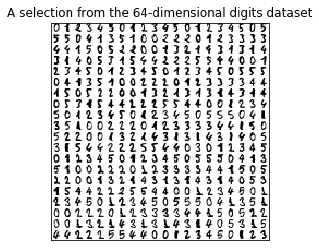

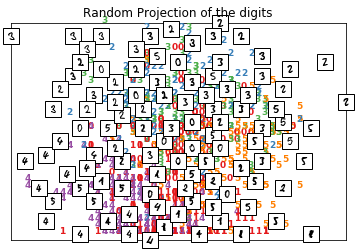

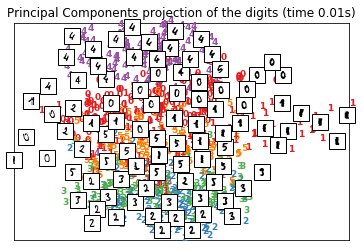

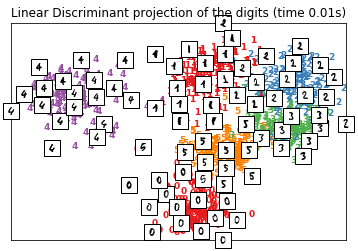

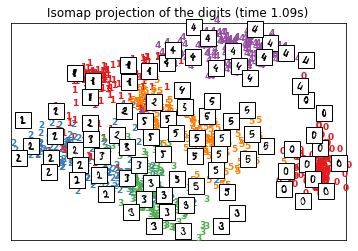

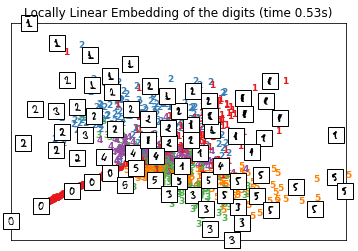

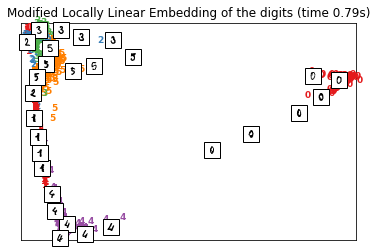

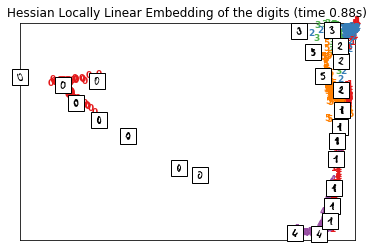

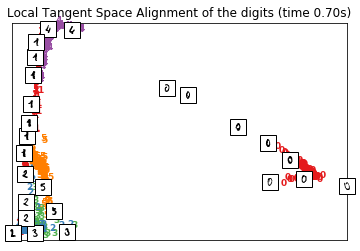

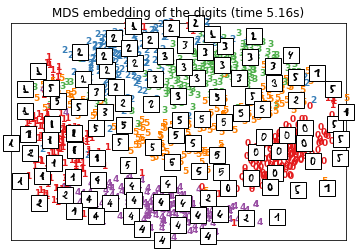

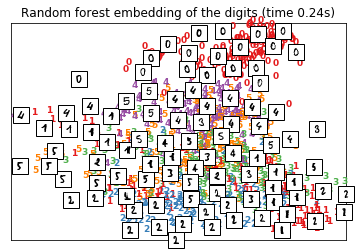

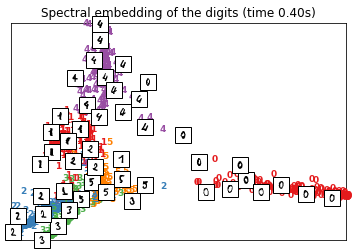

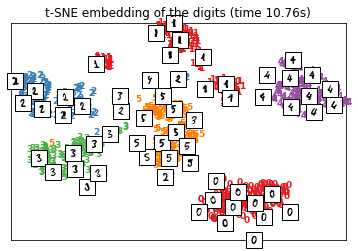

In [51]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.savefig("{}.png".format(title),dpi = 1000)


#----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')


#----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")


#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Projection on to the first 2 linear discriminant components

print("Computing Linear Discriminant Analysis projection")
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
plot_embedding(X_lda,
               "Linear Discriminant projection of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle,
               "Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_mlle,
               "Modified Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# HLLE embedding of the digits dataset
print("Computing Hessian LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='hessian')
t0 = time()
X_hlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_hlle,
               "Hessian Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# LTSA embedding of the digits dataset
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_ltsa,
               "Local Tangent Space Alignment of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced,
               "Random forest embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se,
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

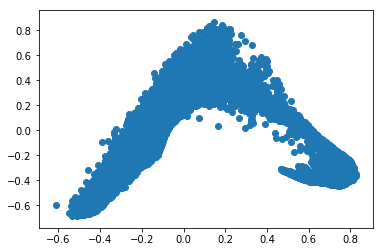

In [28]:
with open("X_spectral.pickle","rb") as fp:
    x_se = pickle.load(fp)
    
plt.scatter(x_se[:,0],x_se[:,1])
plt.savefig('spectral.png', dpi = 1000)
plt.show()

In [26]:
len(x_se)

13327

In [30]:
with open("data_LSEPAELTDAVK_fragmentIonIntensity_Scaled.pickle","rb") as fp:
    data = pickle.load(fp)

data_arr = np.asarray(data)

print("Loaded data...")

def numpy_fillna(data):
    # Get lengths of each row of data
    lens = np.array([len(i) for i in data])

    # Mask of valid places in each row
    mask = np.arange(lens.max()) < lens[:,None]

    # Setup output array and put elements from data into masked positions
    out = np.zeros(mask.shape, dtype=data.dtype)
    out[mask] = np.concatenate(data)
    return out

data_filled = numpy_fillna(data_arr)

Loaded data...


In [12]:
data_filled.shape

(13327, 108)

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)


#X = data_filled[:2500]
#y = labels
#n_samples, n_features = X.shape
#n_neighbors = 30
colordict = {1:"red", 2:"blue", 3:"green", 4:"purple", 5:"black"}
color_list = []
for i in range(len(labels)):
    color_list.append(colordict.get(labels[i]))

Computing random projection


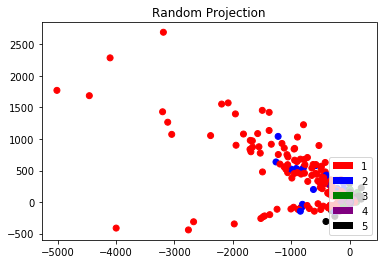

In [122]:
#----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plt.title("Random Projection")
plt.scatter(X_projected[:,0],X_projected[:,1],c=color_list)
colors = ['red','blue','green','purple', 'black']
labels_legend = [1,2,3,4,5]
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,labels_legend,loc=4)
plt.savefig('X_projected_color.png', dpi = 1000)
plt.show()

Computing PCA projection


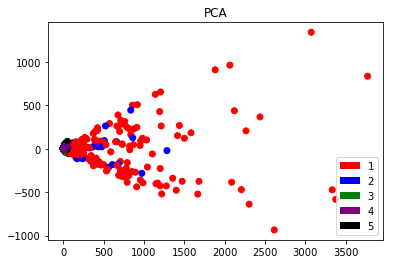

In [136]:
#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plt.title("PCA")
plt.scatter(X_pca[:,0],X_pca[:,1],c=color_list)
colors = ['red','blue','green','purple', 'black']
labels_legend = [1,2,3,4,5]
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,labels_legend,loc=4)
plt.savefig('X_pca_color.png', dpi = 1000)
plt.show()

Computing Isomap embedding


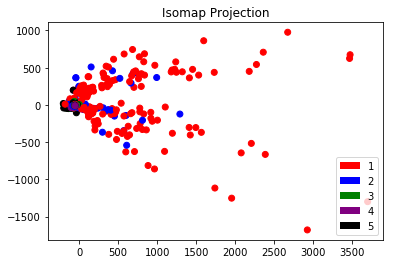

In [124]:
#----------------------------------------------------------------------
# Isomap projection 
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
plt.title("Isomap Projection")
plt.scatter(X_iso[:,0],X_iso[:,1],c=color_list)
colors = ['red','blue','green','purple', 'black']
labels_legend = [1,2,3,4,5]
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,labels_legend,loc=4)
plt.savefig('X_iso_color.png', dpi = 1000)
plt.show()

Computing LLE embedding


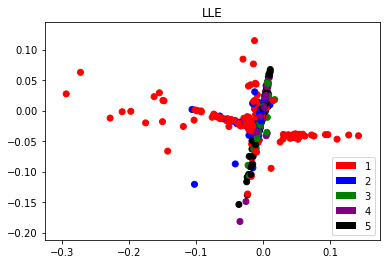

In [125]:
#----------------------------------------------------------------------
# Locally linear embedding 
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')
X_lle = clf.fit_transform(X)
plt.title("LLE")
plt.scatter(X_lle[:,0],X_lle[:,1],c=color_list)
colors = ['red','blue','green','purple', 'black']
labels_legend = [1,2,3,4,5]
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,labels_legend,loc=4)
plt.savefig('X_lle_color.png', dpi = 1000)
plt.show()

Computing modified LLE embedding


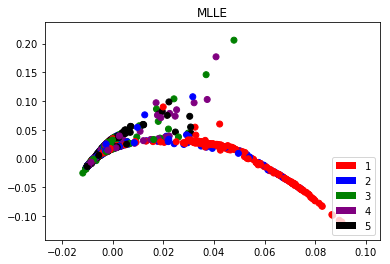

In [126]:
#----------------------------------------------------------------------
# Modified Locally linear embedding 
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='modified')
X_mlle = clf.fit_transform(X)
plt.title("MLLE")
plt.scatter(X_mlle[:,0],X_mlle[:,1],c=color_list)
colors = ['red','blue','green','purple', 'black']
labels_legend = [1,2,3,4,5]
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,labels_legend,loc=4)
plt.savefig('X_mlle_color.png', dpi = 1000)
plt.show()

Computing MDS embedding


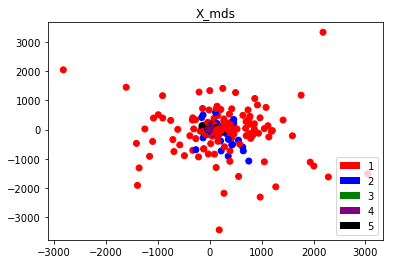

In [127]:
#----------------------------------------------------------------------
# MDS  embedding 
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
X_mds = clf.fit_transform(X)
plt.title("X_mds")
plt.scatter(X_mds[:,0],X_mds[:,1],c = color_list)
colors = ['red','blue','green','purple', 'black']
labels_legend = [1,2,3,4,5]
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,labels_legend,loc=4)
plt.savefig('X_mds_color.png', dpi = 1000)
plt.show()

Computing Totally Random Trees embedding


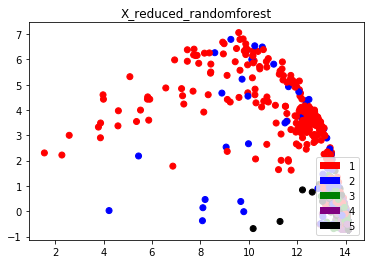

In [128]:
#----------------------------------------------------------------------
# Random Trees embedding 
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)
plt.title("X_reduced_randomforest")
plt.scatter(X_reduced[:,0],X_reduced[:,1],c = color_list)
colors = ['red','blue','green','purple', 'black']
labels_legend = [1,2,3,4,5]
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,labels_legend,loc=4)
plt.savefig('X_reduced_randomforest_color.png', dpi = 1000)
plt.show()

Computing Spectral embedding


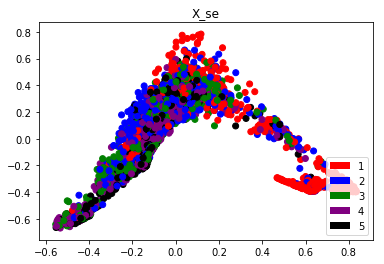

In [129]:
#----------------------------------------------------------------------
# Spectral embedding
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
X_se = embedder.fit_transform(X)
plt.title("X_se")
plt.scatter(X_se[:,0],X_se[:,1], c=color_list)
colors = ['red','blue','green','purple', 'black']
labels_legend = [1,2,3,4,5]
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,labels_legend,loc=4)
plt.savefig('X_se_color.png', dpi = 1000)
plt.show()

Computing t-SNE embedding


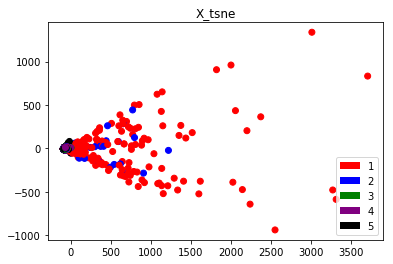

In [119]:
#----------------------------------------------------------------------
# t-SNE embedding
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)
colors = [int(i % 23) for i in labels]
plt.title("X_tsne")
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=color_list)
colors = ['red','blue','green','purple', 'black']
labels_legend = [1,2,3,4,5]
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,labels_legend,loc=4)
plt.savefig('X_tsne_color.png', dpi = 1000)
plt.show()

In [13]:
data_filled

array([[0.0, 0.9882352941176471, 7.215686274509804, ..., 0, 0, 0],
       [0.6588235294117647, 0.32941176470588235, 3.984313725490196, ..., 0,
        0, 0],
       [0.16470588235294117, 0.32941176470588235, 4.392156862745098, ...,
        0, 0, 0],
       ..., 
       [1.4823529411764707, 1.3176470588235294, 1.3176470588235294, ..., 0,
        0, 0],
       [0.32941176470588235, 1.6470588235294117, 0.49411764705882355, ...,
        0, 0, 0],
       [0.16470588235294117, 0.0, 0.0, ..., 0, 0, 0]], dtype=object)

In [14]:
data_filled[1]

array([0.6588235294117647, 0.32941176470588235, 3.984313725490196,
       25.235294117647058, 30.788235294117648, 27.474509803921567,
       14.843137254901961, 7.4, 2.462745098039216, 0.8235294117647058,
       0.8235294117647058, 3.623529411764706, 20.466666666666665,
       32.090196078431376, 31.71764705882353, 14.207843137254901,
       5.415686274509804, 2.1411764705882352, 0.0, 0.0, 0.0,
       0.1607843137254902, 0.6235294117647059, 0.1568627450980392,
       0.3215686274509804, 0.0, 0.0, 0.49411764705882355,
       0.49411764705882355, 0.9882352941176471, 6.32156862745098,
       9.996078431372549, 10.51764705882353, 6.670588235294118,
       3.4156862745098038, 0.6588235294117647, 0.16470588235294117, 0.0,
       1.3176470588235294, 7.556862745098039, 7.87843137254902,
       10.07843137254902, 4.423529411764706, 3.0823529411764707,
       0.16470588235294117, 0.1411764705882353, 0.6588235294117647,
       1.9764705882352942, 9.207843137254901, 10.909803921568628,
       11.5

In [15]:
data_filled.shape

(13327, 108)

(array([ 83.,   6.,   6.,   5.,   2.,   0.,   1.,   1.,   1.,   3.]),
 array([  0.        ,   3.20901961,   6.41803922,   9.62705882,
         12.83607843,  16.04509804,  19.25411765,  22.46313725,
         25.67215686,  28.88117647,  32.09019608]),
 <a list of 10 Patch objects>)

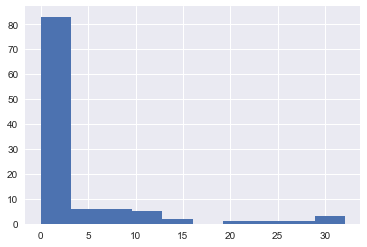

In [17]:
plt.hist(data_filled[1])

In [144]:
np.asarray(data_filled[1]).reshape(6,9)

array([[  0.65882353,   0.32941176,   3.98431373,  25.23529412,
         30.78823529,  27.4745098 ,  14.84313725,   7.4       ,   2.4627451 ],
       [  0.82352941,   0.82352941,   3.62352941,  20.46666667,
         32.09019608,  31.71764706,  14.20784314,   5.41568627,
          2.14117647],
       [  0.        ,   0.        ,   0.        ,   0.16078431,
          0.62352941,   0.15686275,   0.32156863,   0.        ,   0.        ],
       [  0.49411765,   0.49411765,   0.98823529,   6.32156863,
          9.99607843,  10.51764706,   6.67058824,   3.41568627,
          0.65882353],
       [  0.16470588,   0.        ,   1.31764706,   7.55686275,
          7.87843137,  10.07843137,   4.42352941,   3.08235294,
          0.16470588],
       [  0.14117647,   0.65882353,   1.97647059,   9.20784314,
         10.90980392,  11.50980392,   7.70588235,   2.81568627,
          0.65882353]])

In [184]:
data_old_x = [i for i in data_filled[1]]

In [163]:
data_temp = [i * 255.0 for i in data_filled[1]]

In [165]:
data_temp = [((np.arcsinh(10*i)/3.0)) for i in data_temp]

In [167]:
data_temp = [i/4.0018487947062358 for i in data_temp]

In [182]:
np.asarray(data_temp).reshape(12,9)

array([[ 0.67632876,  0.61859321,  0.82623153,  0.97998367,  0.9965501 ,
         0.98706499,  0.9357786 ,  0.8778006 ,  0.78615934],
       [ 0.69491547,  0.69491547,  0.81832547,  0.9625379 ,  1.        ,
         0.99902734,  0.932135  ,  0.85179759,  0.77450463],
       [ 0.        ,  0.        ,  0.        ,  0.55885052,  0.67174257,
         0.55679376,  0.61658601,  0.        ,  0.        ],
       [ 0.65236634,  0.65236634,  0.71010191,  0.86468061,  0.90284843,
         0.90708494,  0.86915693,  0.81340523,  0.67632876],
       [ 0.56085771,  0.        ,  0.73406434,  0.8795478 ,  0.88301892,
         0.90353184,  0.8349419 ,  0.80485209,  0.56085771],
       [ 0.5480178 ,  0.67632876,  0.76783749,  0.89600682,  0.91013414,
         0.91459353,  0.88117437,  0.79731497,  0.67632876],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0

In [172]:
data_temp

[0.67632876353510341,
 0.61859320593101585,
 0.82623152555854706,
 0.97998366898219635,
 0.99655010126147281,
 0.98706498631650974,
 0.93577860433419502,
 0.87780060002643823,
 0.78615934205596971,
 0.69491546607132793,
 0.69491546607132793,
 0.8183254667292702,
 0.96253789669877365,
 1.0,
 0.99902733707799929,
 0.93213499882379669,
 0.85179758597257837,
 0.77450462979219559,
 0.0,
 0.0,
 0.0,
 0.55885051898514548,
 0.67174256936201104,
 0.55679375817554377,
 0.61658600581583844,
 0.0,
 0.0,
 0.65236633863963478,
 0.65236633863963478,
 0.71010190854040145,
 0.86468061223060089,
 0.90284842784442332,
 0.90708494135251105,
 0.86915693238395408,
 0.81340523298629597,
 0.67632876353510341,
 0.56085771472884005,
 0.0,
 0.73406433773970992,
 0.87954780272307842,
 0.88301892307140806,
 0.90353184309637213,
 0.83494189992358592,
 0.80485208759943916,
 0.56085771472884005,
 0.54801780198193206,
 0.67632876353510341,
 0.76783748581918043,
 0.89600682141257559,
 0.91013414106787371,
 0.9145935265

In [18]:
sub_data_filled = data_filled[:2500]

In [192]:
labels[:2500]

[1,
 2,
 4,
 5,
 3,
 2,
 1,
 4,
 3,
 5,
 1,
 2,
 4,
 3,
 1,
 3,
 2,
 4,
 5,
 1,
 2,
 3,
 4,
 5,
 1,
 5,
 3,
 2,
 4,
 1,
 2,
 5,
 4,
 3,
 1,
 4,
 2,
 5,
 3,
 1,
 2,
 3,
 5,
 4,
 1,
 5,
 3,
 2,
 4,
 1,
 3,
 4,
 2,
 5,
 1,
 5,
 4,
 3,
 2,
 1,
 4,
 2,
 5,
 3,
 1,
 2,
 3,
 4,
 5,
 1,
 2,
 4,
 3,
 5,
 5,
 2,
 3,
 1,
 4,
 1,
 2,
 3,
 4,
 5,
 2,
 1,
 4,
 3,
 5,
 5,
 3,
 2,
 1,
 4,
 1,
 3,
 4,
 5,
 2,
 1,
 2,
 5,
 3,
 4,
 2,
 1,
 4,
 5,
 3,
 2,
 4,
 1,
 3,
 5,
 1,
 2,
 3,
 5,
 4,
 1,
 4,
 2,
 3,
 5,
 2,
 1,
 4,
 3,
 5,
 4,
 2,
 1,
 3,
 5,
 1,
 3,
 2,
 4,
 5,
 1,
 2,
 3,
 4,
 5,
 1,
 3,
 4,
 2,
 5,
 1,
 2,
 4,
 3,
 5,
 2,
 4,
 1,
 3,
 5,
 1,
 2,
 3,
 4,
 5,
 3,
 2,
 4,
 1,
 5,
 1,
 2,
 3,
 5,
 4,
 1,
 2,
 4,
 3,
 5,
 1,
 2,
 3,
 4,
 5,
 1,
 2,
 4,
 5,
 3,
 1,
 3,
 2,
 5,
 4,
 1,
 2,
 5,
 4,
 3,
 1,
 2,
 4,
 3,
 5,
 1,
 5,
 4,
 2,
 3,
 2,
 1,
 4,
 3,
 5,
 2,
 1,
 4,
 5,
 3,
 2,
 1,
 3,
 5,
 4,
 1,
 4,
 2,
 5,
 3,
 4,
 1,
 2,
 3,
 5,
 1,
 3,
 2,
 4,
 5,
 1,
 3,
 4,
 5,
 2,
 1,
 2,
 5,
 3,
 4,
 1,


In [195]:
type(sub_data_filled)

numpy.ndarray

In [19]:
y = np.asarray(labels[:2500])


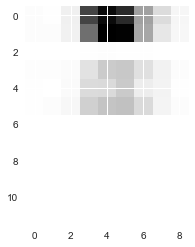

In [20]:
temp_X = [i for i in X[1]]
plt.imshow(np.asarray(temp_X).reshape(12,9))

In [210]:
digits.data[1]

array([  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.,   0.,   0.,   0.,
        11.,  16.,   9.,   0.,   0.,   0.,   0.,   3.,  15.,  16.,   6.,
         0.,   0.,   0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.,   0.,
         0.,   1.,  16.,  16.,   3.,   0.,   0.,   0.,   0.,   1.,  16.,
        16.,   6.,   0.,   0.,   0.,   0.,   1.,  16.,  16.,   6.,   0.,
         0.,   0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.])

In [201]:
X = sub_data_filled

Computing t-SNE embedding


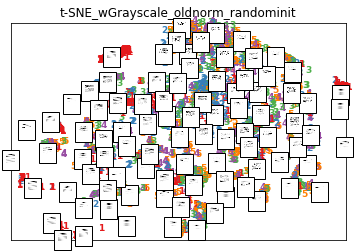

In [259]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

X = sub_data_filled
y = np.asarray(labels[:2500])
n_samples, n_features = X.shape
n_neighbors = 30


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure()
    ax = plt.subplot(111)
    
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    
    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            temp_X = [z for z in sub_data_filled[i]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(np.asarray(temp_X).reshape(12,9), cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
   # plt.savefig("{}.png".format(title),dpi = 1000)


'''
#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,"PCA_w_grayScale")
'''



#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='random', random_state=0)
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE_wGrayscale_oldnorm_randominit")

plt.show()


In [45]:
data_filled.shape

(13327, 108)

In [46]:
full_newnorm = data_filled * 2550.0
final_newnorm_full = []
for i in range(full_newnorm.shape[0]):
    temp = []
    for j in range(full_newnorm.shape[1]):
        temp.append(np.arcsinh(full_newnorm[i][j])/3.0)
    final_newnorm_full.append(temp)
final_newnorm_array_full = np.asarray(final_newnorm_full)
final_newnorm_array_full = final_newnorm_array_full/final_newnorm_array_full.max()

In [48]:
with open("final_newnorm_full.pickle","wb") as fp:
    pickle.dump(final_newnorm_array_full,fp)

In [21]:
sub_newnorm = sub_data_filled * 2550.0

In [238]:
tempt = sub_data_filled * 255.0

In [239]:
tempt.max()

516350.0

In [244]:
sub_newnorm_test = [np.arcsinh(i)/3.0 for i in sub_newnorm[1]]

In [22]:
final_newnorm = []
for i in range(sub_newnorm.shape[0]):
    temp = []
    for j in range(sub_newnorm.shape[1]):
        temp.append(np.arcsinh(sub_newnorm[i][j])/3.0)
    final_newnorm.append(temp)

In [23]:
final_newnorm_array = np.asarray(final_newnorm)

In [24]:
final_newnorm_array = final_newnorm_array/final_newnorm_array.max()

In [25]:
final_newnorm_array.max()

1.0

Computing t-SNE embedding


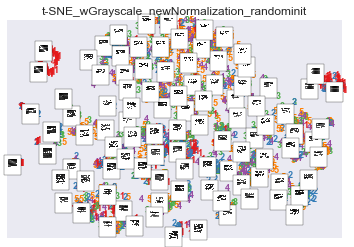

In [34]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)


X = final_newnorm_array
y = np.asarray(labels[:2500])
n_samples, n_features = X.shape
n_neighbors = 30


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure()
    ax = plt.subplot(111)
    
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    
    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            temp_X = [z for z in final_newnorm_array[i]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(np.asarray(temp_X).reshape(12,9), cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    #plt.savefig("{}.png".format(title),dpi = 1000)


'''
#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,"PCA_w_grayScale_newNormalization")
'''


#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='random', random_state=0)
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE_wGrayscale_newNormalization_randominit")

plt.show()

In [35]:
X_tsne

array([[-14.92996857,   2.71155718],
       [ 12.79723653,   6.54213292],
       [  8.81098977,   6.76926064],
       ..., 
       [-11.19198585,   3.28940898],
       [  8.55985088,   6.90676335],
       [  6.79669884,  -4.96564708]])

In [52]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)


X = final_newnorm_array
y = np.asarray(labels[:2500])
n_samples, n_features = X.shape
n_neighbors = 30


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure()
    ax = plt.subplot(111)
    colors = ['red','blue','green','purple', 'black']
    labels_legend = [1,2,3,4,5]
    recs = []
    for i in range(0,len(colors)):
        recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
    plt.legend(recs,labels_legend,loc=4)
    for i in range(X.shape[0]):
        plt.plot(X[i, 0], X[i, 1], marker = "o", c = color_list[i])
    
    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            temp_X = [z for z in final_newnorm_array[i]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(np.asarray(temp_X).reshape(12,9), cmap=plt.cm.gray_r,zoom=0.5),X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.savefig("{}.png".format(title),dpi = 800)



In [26]:
# Old normalized data
sub_data_filled
# New normalized data
final_newnorm_array

array([[ 0.        ,  0.52786487,  0.65096445, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.5027591 ,  0.45984051,  0.61419155, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.41692197,  0.45984051,  0.62022584, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.60543402,  0.59235009,  0.56539586, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.48494627,  0.55297064, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.40737722,  0.52786487, ...,  0.        ,
         0.        ,  0.        ]])

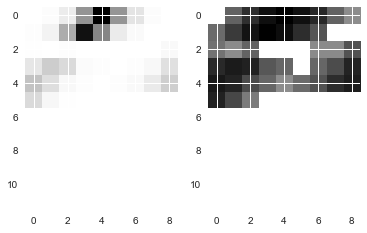

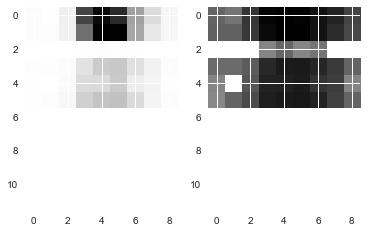

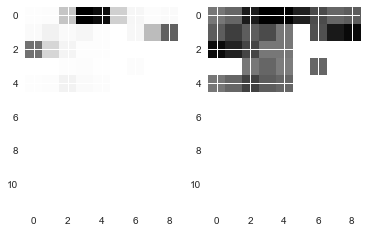

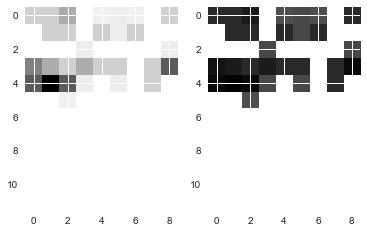

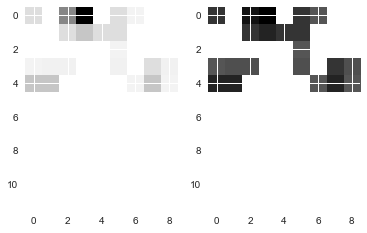

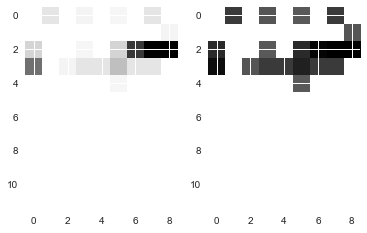

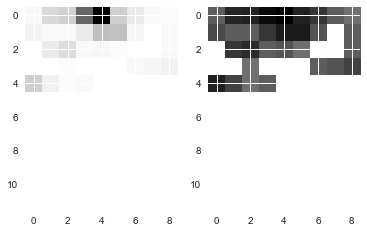

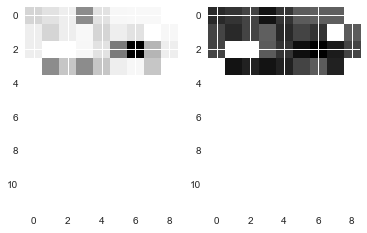

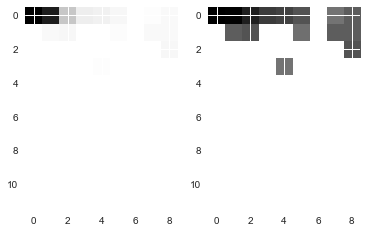

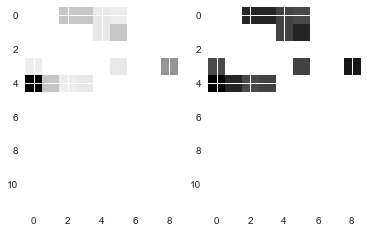

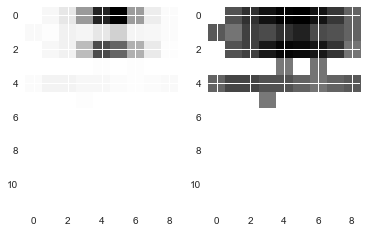

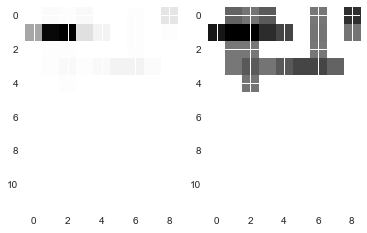

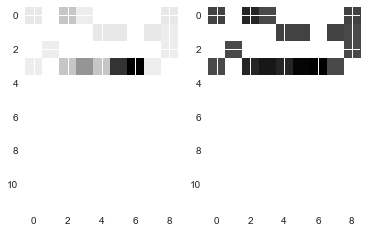

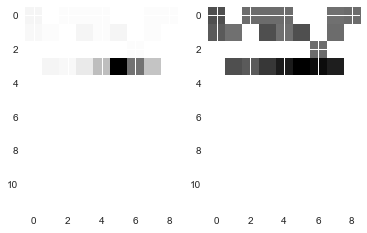

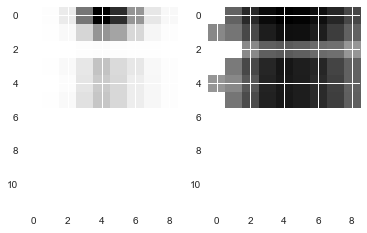

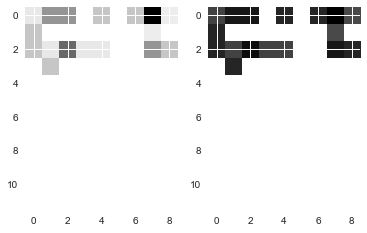

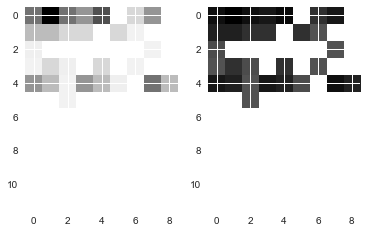

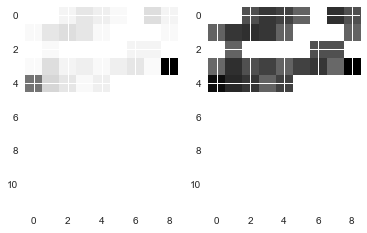

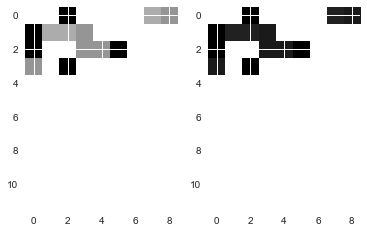

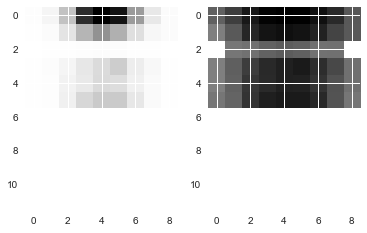

In [32]:
# DO NOT reshape by 12,9 this is wrong as I tried to explain. The initial assumption that the length of time and intensity for a given peptide is uneven was WRONG. Each peptide group has 6 fragment ions, each quantized over it's own time window.
# Plotting these will results in X * 6 images as in the other notebook, which is why the images are not the same size => There is no need for binning the time and intensity values, but the grayscale maps are correct.
for i in range(20):
    plt.figure()
    plt.subplot(121)
    t_sub_data = [z for z in sub_data_filled[i]]
    plt.imshow(np.asarray(t_sub_data).reshape(12,9))
    plt.subplot(122)
    plt.imshow(final_newnorm_array[i].reshape(12,9))
    plt.savefig("test.png",dpi=800)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

neighbours_sub = KNeighborsClassifier(n_neighbors=3)
neighbours_sub.fit(X_tsne, labels[:2500]) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [37]:
X_tsne[5]

array([ 1.23941327,  7.18886297])

In [40]:
labels[5]

2

In [ ]:
for i in range(15):
    print("LABEL = {} **** PREDICTED = {}".format(labels[i],neighbours_sub.predict(X_tsne[i])))

In [159]:
with open("X_tsne_pcainit.pickle","rb") as fp:
    X_tsne_full_newnorm_pcainit = pickle.load(fp)

In [160]:
from sklearn.neighbors import KNeighborsClassifier

neighbours_full_1 = KNeighborsClassifier(n_neighbors=1)
neighbours_full_1.fit(X_tsne_full_newnorm_pcainit, labels) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [161]:
from sklearn.neighbors import KNeighborsClassifier

neighbours_full_3 = KNeighborsClassifier(n_neighbors=3)
neighbours_full_3.fit(X_tsne_full_newnorm_pcainit, labels) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [162]:
from sklearn.neighbors import KNeighborsClassifier

neighbours_full_5 = KNeighborsClassifier(n_neighbors=5)
neighbours_full_5.fit(X_tsne_full_newnorm_pcainit, labels) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [163]:
from sklearn.neighbors import KNeighborsClassifier

neighbours_full_7 = KNeighborsClassifier(n_neighbors=7)
neighbours_full_7.fit(X_tsne_full_newnorm_pcainit, labels) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [168]:
X_tsne_full_newnorm_pcainit

array([[ 31.17149734, -57.53521347],
       [ 53.44267654, -30.03528786],
       [-47.66598129, -40.00579453],
       ..., 
       [ -8.60633564,  45.09520721],
       [-66.29238892, -11.43650341],
       [-43.41291046,  23.55116653]], dtype=float32)

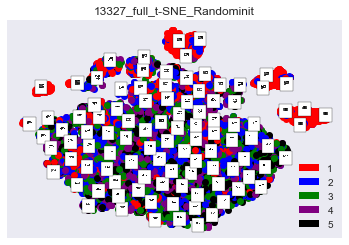

In [59]:
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure()
    ax = plt.subplot(111)
    colors = ['red','blue','green','purple', 'black']
    labels_legend = [1,2,3,4,5]
    recs = []
    for i in range(0,len(colors)):
        recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
    plt.legend(recs,labels_legend,loc=4)
    for i in range(X.shape[0]):
        plt.plot(X[i, 0], X[i, 1], marker = "o", c = color_list[i])
    
    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            temp_X = [z for z in final_newnorm_array_full[i]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(np.asarray(temp_X).reshape(12,9), cmap=plt.cm.gray_r,zoom=0.5),X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.savefig("{}.png".format(title),dpi = 800)
    
    
plot_embedding(X_tsne_full_newnorm, "13327_full_t-SNE_Randominit")

In [58]:
final_newnorm_array_full.shape

(13327, 108)

In [ ]:
# 31 August - Create table with KNN representation, OS rank etc..
# TODO - Add Retention Time, File Name, t-SNE with PCA initialization + KNN
%%capture
import pymzml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import pickle
%matplotlib inline
import random
import re
import matplotlib
import itertools


def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""
    
    
gcount = 0
pyprophet_dir = "D:\ETH\RA\Aqua_Peptide_Extraction\mzxml_decoy\pyprophet_result_global"
chrom_mzml_dir = "D:\ETH\RA\Aqua_Peptide_Extraction\mzxml_decoy\openswath_results"
data_df = pd.DataFrame()
for result_filename in sorted(os.listdir(pyprophet_dir)):
    if result_filename.endswith("scored.txt"):
        core_file_name = find_between(result_filename,"TSV_",".mzXML")
        chrom_file_name = "OUT_CHROM_" + core_file_name + ".mzXML.gz.chrom.mzML"
        chrom_file_path = os.path.join(chrom_mzml_dir,"{}".format(chrom_file_name))
        df = pd.read_csv(os.path.join(pyprophet_dir,result_filename),sep='\t', header=(0))
        peak_group_folder = "D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Color_LinearScale_Output"
        # Iterate over all selected peak groups
        for i in range(len(df['aggr_Fragment_Annotation'])):
            # Extract grayscale images only for LSEPAELTDAVK - TODO for all peptides
            if(df['Sequence'][i] == "LSEPAELTDAVK" ):
                fragment_ions = df['aggr_Fragment_Annotation'][i]
                re_sub_exp = re.sub('[^\w\-_\. ]', '_', df['peptide_group_label'][i])
                if df['peak_group_rank'][i] == 1:
                    final_sub_folder = 1
                else:
                    final_sub_folder = 0
                peakgroup_filename = "{}_rank_{}.png".format(df['Sequence'][i],df['peak_group_rank'][i])
                peakgroup_image_path = r"D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Color_LinearScale_Output\{}\{}\{}\{}".format(core_file_name, re_sub_exp, final_sub_folder,peakgroup_filename)
                grayscale_image_file_name = "{}_Rank_{}.png".format(re_sub_exp, df['peak_group_rank'][i])
                grayscale_image_path = r"D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Grayscale_map\{}".format(core_file_name)
                if not os.path.exists(grayscale_image_path):
                    os.makedirs(grayscale_image_path)
                grayscale_image_path = os.path.join(grayscale_image_path, grayscale_image_file_name)
                plt.imshow(final_newnorm_array[gcount].reshape(12,9))
                plt.savefig(grayscale_image_path,dpi=100)
                # Use file:/// for windows and file:\\ for linux 
                temp_row = pd.DataFrame(np.array([[core_file_name, df['RT'][i], df['peptide_group_label'][i], '<img src="{}"/>'.format(grayscale_image_path), '<img src="{}"/>'.format(peakgroup_image_path), df['peak_group_rank'][i], str(neighbours_full_1.predict(X_tsne_full_newnorm_pcainit[gcount])), str(neighbours_full_3.predict(X_tsne_full_newnorm_pcainit[gcount])), str(neighbours_full_5.predict(X_tsne_full_newnorm_pcainit[gcount])), str(neighbours_full_7.predict(X_tsne_full_newnorm_pcainit[gcount]))]]), columns = ["File Name", "RT", "ID", "Grayscale Map", "Peakgroup", "OpenSWATH Rank", "KNN_1 Rank", "KNN_3 Rank", "KNN_5 Rank", "KNN_7 Rank"])
                data_df = data_df.append(temp_row)
                gcount = gcount + 1
                print("Count = {}".format(gcount))
                if gcount == 201:
                    raise

In [170]:
data_df.to_html("LSEPAELTDAVK_201_PCA_init.html", escape = False)

In [ ]:
with open("data_df_1000.pickle", "wb") as fp:
    pickle.dump(data_df,fp)

In [153]:
data_df.sort_values(by=['OpenSWATH Rank'])

ID  \
0  10000068_LSEPAELTDAVK_2   
0  10000068_LSEPAELTDAVK_2   
0  10000068_LSEPAELTDAVK_2   
0  10000068_LSEPAELTDAVK_2   
0  10000068_LSEPAELTDAVK_2   
0  10000069_LSEPAELTDAVK_3   
0  10000069_LSEPAELTDAVK_3   
0  10000069_LSEPAELTDAVK_3   
0  10000069_LSEPAELTDAVK_3   
0  10000069_LSEPAELTDAVK_3   

                                                                                                                                   Grayscale Map  \
0  <img src="D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Grayscale_map\guot_PC1_170125_CPP10_sw\10000068_LSEPAELTDAVK_2_Rank_1.png"/>   
0  <img src="D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Grayscale_map\guot_PC1_170125_CPP10_sw\10000068_LSEPAELTDAVK_2_Rank_2.png"/>   
0  <img src="D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Grayscale_map\guot_PC1_170125_CPP10_sw\10000068_LSEPAELTDAVK_2_Rank_4.png"/>   
0  <img src="D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Grayscale_map\guot_PC1_170125_CPP10_sw\10000068_LSEPAELTDAVK_2_Rank_5.png"/>   
0  <img src="D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Grayscale_map\guot_PC1_170125_CPP10_sw\10000068_LSEPAELTDAVK_2_Rank_3.png"/>   
0  <img src="D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Grayscale_map\guot_PC1_170125_CPP10_sw\10000069_LSEPAELTDAVK_3_Rank_2.png"/>   
0  <img src="D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Grayscale_map\guot_PC1_170125_CPP10_sw\10000069_LSEPAELTDAVK_3_Rank_1.png"/>   
0  <img src="D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Grayscale_map\guot_PC1_170125_CPP10_sw\10000069_LSEPAELTDAVK_3_Rank_4.png"/>   
0  <img src="D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Grayscale_map\guot_PC1_170125_CPP10_sw\10000069_LSEPAELTDAVK_3_Rank_3.png"/>   
0  <img src="D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Grayscale_map\guot_PC1_170125_CPP10_sw\10000069_LSEPAELTDAVK_3_Rank_5.png"/>   

                                                                                                                                                                 Peakgroup  \
0  <img src="D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Color_LinearScale_Output\guot_PC1_170125_CPP10_sw\10000068_LSEPAELTDAVK_2\1\LSEPAELTDAVK_rank_1.png"/>   
0  <img src="D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Color_LinearScale_Output\guot_PC1_170125_CPP10_sw\10000068_LSEPAELTDAVK_2\0\LSEPAELTDAVK_rank_2.png"/>   
0  <img src="D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Color_LinearScale_Output\guot_PC1_170125_CPP10_sw\10000068_LSEPAELTDAVK_2\0\LSEPAELTDAVK_rank_4.png"/>   
0  <img src="D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Color_LinearScale_Output\guot_PC1_170125_CPP10_sw\10000068_LSEPAELTDAVK_2\0\LSEPAELTDAVK_rank_5.png"/>   
0  <img src="D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Color_LinearScale_Output\guot_PC1_170125_CPP10_sw\10000068_LSEPAELTDAVK_2\0\LSEPAELTDAVK_rank_3.png"/>   
0  <img src="D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Color_LinearScale_Output\guot_PC1_170125_CPP10_sw\10000069_LSEPAELTDAVK_3\0\LSEPAELTDAVK_rank_2.png"/>   
0  <img src="D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Color_LinearScale_Output\guot_PC1_170125_CPP10_sw\10000069_LSEPAELTDAVK_3\1\LSEPAELTDAVK_rank_1.png"/>   
0  <img src="D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Color_LinearScale_Output\guot_PC1_170125_CPP10_sw\10000069_LSEPAELTDAVK_3\0\LSEPAELTDAVK_rank_4.png"/>   
0  <img src="D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Color_LinearScale_Output\guot_PC1_170125_CPP10_sw\10000069_LSEPAELTDAVK_3\0\LSEPAELTDAVK_rank_3.png"/>   
0  <img src="D:\ETH\RA\Aqua_Peptide_Extraction\colored_ions_extract\Color_LinearScale_Output\guot_PC1_170125_CPP10_sw\10000069_LSEPAELTDAVK_3\0\LSEPAELTDAVK_rank_5.png"/>   

  OpenSWATH Rank KNN_1 Rank KNN_3 Rank KNN_5 Rank  
0  1              [5]        [2]        [5]        
0  2              [2]        [3]        [2]  

In [144]:
from IPython.display import Image, HTML
HTML(data_df.to_html(escape=False))

In [62]:
df

transition_group_id  \
0                         10000068_LSEPAELTDAVK_2_run0   
1                         10000068_LSEPAELTDAVK_2_run0   
2                         10000068_LSEPAELTDAVK_2_run0   
3                         10000068_LSEPAELTDAVK_2_run0   
4                         10000068_LSEPAELTDAVK_2_run0   
5                         10000107_YQEVTNNLEFAK_2_run0   
6                         10000107_YQEVTNNLEFAK_2_run0   
7                         10000107_YQEVTNNLEFAK_2_run0   
8                         10000107_YQEVTNNLEFAK_2_run0   
9                         10000107_YQEVTNNLEFAK_2_run0   
10              10000065_LNISFPATGC(UniMod:4)QK_2_run0   
11              10000065_LNISFPATGC(UniMod:4)QK_2_run0   
12              10000065_LNISFPATGC(UniMod:4)QK_2_run0   
13              10000065_LNISFPATGC(UniMod:4)QK_2_run0   
14              10000065_LNISFPATGC(UniMod:4)QK_2_run0   
15   10000011_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K_2_run0   
16   10000011_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K_2_run0   
17   10000011_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K_2_run0   
18   10000011_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K_2_run0   
19   10000011_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K_2_run0   
20   90000011_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K(Uni...   
21   90000011_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K(Uni...   
22   90000011_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K(Uni...   
23   90000011_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K(Uni...   
24   90000011_DC(UniMod:4)SSIPSVPGSC(UniMod:4)K(Uni...   
25   DECOY_90000011_DC(UniMod:4)SSIPSVPGSC(UniMod:4...   
26   DECOY_90000011_DC(UniMod:4)SSIPSVPGSC(UniMod:4...   
27   DECOY_90000011_DC(UniMod:4)SSIPSVPGSC(UniMod:4...   
28   DECOY_90000011_DC(UniMod:4)SSIPSVPGSC(UniMod:4...   
29   DECOY_90000011_DC(UniMod:4)SSIPSVPGSC(UniMod:4...   
..                                                 ...   
246          90000029_FPQLDSTSFANSR(UniMod:267)_2_run0   
247          90000029_FPQLDSTSFANSR(UniMod:267)_2_run0   
248          90000029_FPQLDSTSFANSR(UniMod:267)_2_run0   
249    DECOY_90000029_FPQLDSTSFANSR(UniMod:267)_2_run0   
250    DECOY_90000029_FPQLDSTSFANSR(UniMod:267)_2_run0   
251    DECOY_90000029_FPQLDSTSFANSR(UniMod:267)_2_run0   
252    DECOY_90000029_FPQLDSTSFANSR(UniMod:267)_2_run0   
253    DECOY_90000029_FPQLDSTSFANSR(UniMod:267)_2_run0   
254          10000095_VLTQASNPVVC(UniMod:4)TQPK_2_run0   
255          10000095_VLTQASNPVVC(UniMod:4)TQPK_2_run0   
256          10000095_VLTQASNPVVC(UniMod:4)TQPK_2_run0   
257          10000095_VLTQASNPVVC(UniMod:4)TQPK_2_run0   
258          10000095_VLTQASNPVVC(UniMod:4)TQPK_2_run0   
259  90000095_VLTQASNPVVC(UniMod:4)TQPK(UniMod:259)...   
260  90000095_VLTQASNPVVC(UniMod:4)TQPK(UniMod:259)...   
261  90000095_VLTQASNPVVC(UniMod:4)TQPK(UniMod:259)...   
262  90000095_VLTQASNPVVC(UniMod:4)TQPK(UniMod:259)...   
263  90000095_VLTQASNPVVC(UniMod:4)TQPK(UniMod:259)...   
264    DECOY_10000095_VLTQASNPVVC(UniMod:4)TQPK_2_run0   
265    DECOY_10000095_VLTQASNPVVC(UniMod:4)TQPK_2_run0   
266                      10000102_VYENYPTYDLTER_2_run0   
267                      10000102_VYENYPTYDLTER_2_run0   
268                      10000102_VYENYPTYDLTER_2_run0   
269                      10000102_VYENYPTYDLTER_2_run0   
270                      10000102_VYENYPTYDLTER_2_run0   
271                DECOY_10000102_VYENYPTYDLTER_2_run0   
272                DECOY_10000102_VYENYPTYDLTER_2_run0   
273                DECOY_10000102_VYENYPTYDLTER_2_run0   
274                DECOY_10000102_VYENYPTYDLTER_2_run0   
275                DECOY_10000102_VYENYPTYDLTER_2_run0   

                                   peptide_group_label  run_id  \
0                              10000068_LSEPAELTDAVK_2       0   
1                              10000068_LSEPAELTDAVK_2       0   
2                              10000068_LSEPAELTDAVK_2       0   
3                              10000068_LSEPAELTDAVK_2       0   
4                              10000068_LSEPAELTDAVK_2       0   
5                              10000107_YQ

In [67]:
import pandas as pd
from IPython.display import Image, HTML

df2 = pd.DataFrame(['<img src="image01.png"/>', './image02.png'], columns = ['Image'])

In [90]:
import numpy as np
from io import BytesIO
from PIL import Image
from base64 import b64encode
from matplotlib import cm
from matplotlib.colors import Normalize
   
def matshow_func(x):
   b = BytesIO()  
   norm = Normalize(clip=True)         
   if not np.ma.isMaskedArray(x):
      x = np.ma.array(x,mask = np.isnan(x))            
   c = cm.jet(norm(x), bytes=True)
   Image.fromarray(c).save(b, format='png')
   return '<img alt="2d array" src="data:image/png;base64,' + b64encode(b.getvalue()) + '" />'
   
matshow_func.escape = False  # This prevents the "<" tags getting escaped
matshow_func.justify = 'all' # This prevents the long string of data getting abrieviated with "..."

In [98]:
import pandas as pd
df = pd.DataFrame(columns=('boring','interesting'),index=range(4))

df.interesting[0] = np.asarray(range(225)).reshape((15,15))
df.interesting[2] = np.asarray(range(225)).reshape((15,15)).T
df.interesting[3] = np.random.randint(100,size=(15,15))
df.boring[2] = np.asarray(range(225)).reshape((15,15))

In [ ]:
df.to_html(formatters=dict(interesting=matshow_func))